In [1]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('ai4i2020.csv')
df.head()

Saving ai4i2020.csv to ai4i2020.csv


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [2]:
#finding number of rows in the datasaet
n=df.shape[0]
print(n)

10000


In [3]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
#finding whether there is any duplicate ProductIDs
if df['Product ID'].unique().shape[0]!=n:
  print("Duplicate Product IDs not found")
else:
  print("All Product IDs are unique")

All Product IDs are unique


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
#converting Tool Wear and rotational speed into float
df['Tool wear [min]']=df['Tool wear [min]'].astype(float)
df['Rotational speed [rpm]']=df['Rotational speed [rpm]'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  float64
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  float64
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(5), int64(7)

In [7]:
#renaming feature columns for simplicity
df.rename(
    mapper={
        'Air temperature [K]': 'Air Temperature',
        'Process temperature [K]': 'Process Temperature',
        'Rotational speed [rpm]': 'Rotational Speed',
        'Torque [Nm]': 'Torque',
        'Tool wear [min]': 'Tool Wear',
        'Machine failure': 'Machine Failure',
    },
    axis=1,
    inplace=True
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air Temperature      10000 non-null  float64
 4   Process Temperature  10000 non-null  float64
 5   Rotational Speed     10000 non-null  float64
 6   Torque               10000 non-null  float64
 7   Tool Wear            10000 non-null  float64
 8   Machine Failure      10000 non-null  int64  
 9   TWF                  10000 non-null  int64  
 10  HDF                  10000 non-null  int64  
 11  PWF                  10000 non-null  int64  
 12  OSF                  10000 non-null  int64  
 13  RNF                  10000 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 1.1+ MB


In [8]:
df.head()

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0


In [9]:
#removing first character from Product ID
df['Product ID']=df['Product ID'].apply(lambda x:x[1:])
df.head()

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF
0,1,14860,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,47181,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,47182,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,47183,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,47184,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0


In [10]:
df['Product ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Product ID
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [11]:
#converting product ID into numeric type
df['Product ID']=pd.to_numeric(df['Product ID'])
df['Product ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Product ID
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [12]:
df.head()

,UDI,Product ID,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF
0,1,14860,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0
1,2,47181,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0
2,3,47182,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0
3,4,47183,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0
4,5,47184,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0


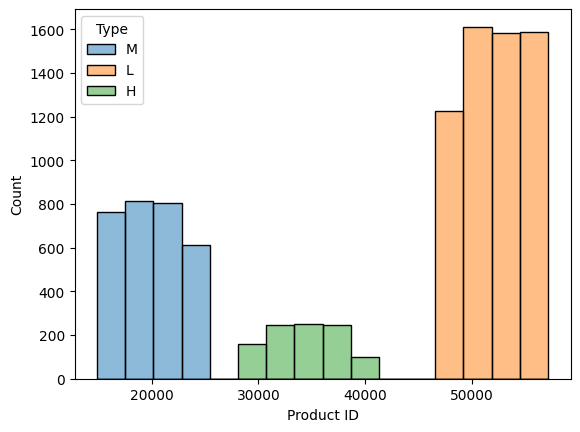

In [13]:
#plotting histogram of product IDs coloured by type
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df,x='Product ID',hue='Type')
plt.show()

In [14]:
#dropping unnecessary ID columns
df.drop(columns=['UDI','Product ID'],inplace=True)
df.head()

,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0
1,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0
2,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0
3,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0
4,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0


In [15]:
#plotting piechart to show distribution of different Product types
#count frequency of each type
value=df['Type'].value_counts()
print(value)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [16]:
#converting raw counts into percentage form
#percentage=(value/total number of rows)*100
type_percentage=(value/n)*100
print(type_percentage)

Type
L    60.00
M    29.97
H    10.03
Name: count, dtype: float64


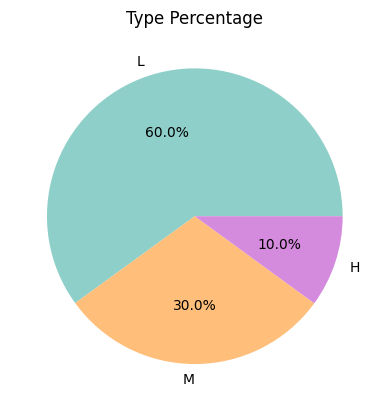

In [ ]:
#getting labels and values for plot
#labels implies unique type names
#x implies corresponding percentage of each type
labels=type_percentage.index.array
x=type_percentage.array
#creating pie chart
plt.pie(x,labels=labels,colors=['#8ECFC9','#FFBE7A','#D58BDD'],autopct='%1.1f%%')
plt.title('Type Percentage')
plt.show()

In [17]:
df['Machine Failure'].value_counts()

,count
Machine Failure,
0,9661
1,339


/tmp/ipython-input-1418980202.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Machine Failure', data=df, palette='Set2')


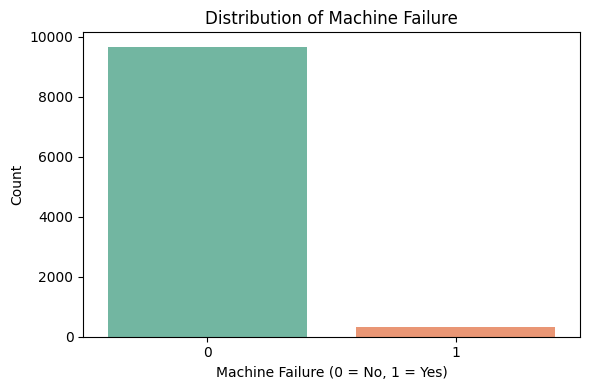

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for Machine Failure
plt.figure(figsize=(6, 4))
sns.countplot(x='Machine Failure', data=df, palette='Set2')

# Add labels
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air Temperature      10000 non-null  float64
 2   Process Temperature  10000 non-null  float64
 3   Rotational Speed     10000 non-null  float64
 4   Torque               10000 non-null  float64
 5   Tool Wear            10000 non-null  float64
 6   Machine Failure      10000 non-null  int64  
 7   TWF                  10000 non-null  int64  
 8   HDF                  10000 non-null  int64  
 9   PWF                  10000 non-null  int64  
 10  OSF                  10000 non-null  int64  
 11  RNF                  10000 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 937.6+ KB


In [ ]:
print(df[['TWF','HDF','PWF','OSF','RNF']].dtypes)


TWF    int64
HDF    int64
PWF    int64
OSF    int64
RNF    int64
dtype: object


In [ ]:
print(df[df['RNF']==1])
print(df['RNF'].value_counts())

     Type  Air Temperature  Process Temperature  Rotational Speed  Torque  \
1221    M            297.0                308.3            1399.0    46.4   
1302    L            298.6                309.8            1505.0    45.7   
1748    H            298.4                307.7            1626.0    31.1   
2072    L            299.6                309.5            1570.0    35.5   
2559    L            299.3                309.0            1447.0    50.4   
3065    M            300.1                309.2            1687.0    27.7   
3452    H            301.6                310.5            1602.0    32.3   
3611    L            301.7                310.9            1405.0    46.4   
5471    L            302.7                312.3            1346.0    61.2   
5489    L            302.6                312.1            1499.0    35.0   
5495    H            302.9                312.5            1357.0    55.0   
5509    L            302.8                312.2            1509.0    36.5   

In [ ]:
#Creating a list of columns to use as features for the model, that is selecting only columns with Dtype float64 and object
features=df.select_dtypes(include=['float64','object']).columns
print(features)
Failure_columns=['TWF','HDF','PWF','OSF','RNF']
#creating a new column "Failure Type" by checking which failure column has value 1
df['Failure Type']=df[Failure_columns].apply(lambda row:row.idxmax()if row.max()==1 else "No Failure",axis=1)
print(df[['TWF','HDF','PWF','OSF','RNF','Failure Type']].head(20))
target=['Machine Failure','Failure Type']

Index(['Type', 'Air Temperature', 'Process Temperature', 'Rotational Speed',
       'Torque', 'Tool Wear'],
      dtype='object')
    TWF  HDF  PWF  OSF  RNF Failure Type
0     0    0    0    0    0   No Failure
1     0    0    0    0    0   No Failure
2     0    0    0    0    0   No Failure
3     0    0    0    0    0   No Failure
4     0    0    0    0    0   No Failure
5     0    0    0    0    0   No Failure
6     0    0    0    0    0   No Failure
7     0    0    0    0    0   No Failure
8     0    0    0    0    0   No Failure
9     0    0    0    0    0   No Failure
10    0    0    0    0    0   No Failure
11    0    0    0    0    0   No Failure
12    0    0    0    0    0   No Failure
13    0    0    0    0    0   No Failure
14    0    0    0    0    0   No Failure
15    0    0    0    0    0   No Failure
16    0    0    0    0    0   No Failure
17    0    0    0    0    0   No Failure
18    0    0    0    0    0   No Failure
19    0    0    0    0    0   No Failure


In [ ]:
df_rnf_failures=df[df['RNF']==1]
print(df_rnf_failures[['RNF', 'Failure Type']].head())


      RNF Failure Type
1221    1          RNF
1302    1          RNF
1748    1          RNF
2072    1          RNF
2559    1          RNF


In [ ]:
#finding all rows where failure type is Random Failure
#getting the row indexes where failure type is random failure
idx_rnf=df.loc[df['Failure Type']=='RNF'].index
#extracting the Target columns only for those rows where failure type is Random Failure
df.loc[idx_rnf,target]


,Machine Failure,Failure Type
1221,0,RNF
1302,0,RNF
1748,0,RNF
2072,0,RNF
2559,0,RNF
3065,0,RNF
3452,0,RNF
5471,0,RNF
5489,0,RNF
5495,0,RNF


In [ ]:
#number of rows where RNF=1
first_drop=df.loc[idx_rnf,target].shape[0]
print(first_drop)

18


In [ ]:
#dropping rows where RNF=1 & Machine Failure=0
print("Number of observations where RNF = 1 but Machine Failure = 0:", first_drop)
df.drop(index=idx_rnf,inplace=True)

Number of observations where RNF = 1 but Machine Failure = 0: 18


In [ ]:
def get_failure_type(row):
    if row['TWF'] == 1:
        return 'TWF'
    elif row['HDF'] == 1:
        return 'HDF'
    elif row['PWF'] == 1:
        return 'PWF'
    elif row['OSF'] == 1:
        return 'OSF'
    elif row['RNF'] == 1:
        return 'RNF'
    else:
        return 'No Failure'

df['Failure Type'] = df.apply(get_failure_type, axis=1)


In [ ]:
# This gets all rows where machine failed
condition_1 = df['Machine Failure'] == 1

# This gets all rows where ALL failure type columns are 0
condition_2 = (df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1) == 0)

# Combine both conditions
final_rows = df[condition_1 & condition_2]

# Show the result
final_rows


,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF,Failure Type
1437,H,298.8,309.9,1439.0,45.2,40.0,1,0,0,0,0,0,No Failure
2749,M,299.7,309.2,1685.0,28.9,179.0,1,0,0,0,0,0,No Failure
4044,M,301.9,310.9,1419.0,47.7,20.0,1,0,0,0,0,0,No Failure
4684,M,303.6,311.8,1421.0,44.8,101.0,1,0,0,0,0,0,No Failure
5536,M,302.3,311.8,1363.0,54.0,119.0,1,0,0,0,0,0,No Failure
5941,L,300.6,310.7,1438.0,48.5,78.0,1,0,0,0,0,0,No Failure
6478,L,300.5,309.8,1663.0,29.1,145.0,1,0,0,0,0,0,No Failure
8506,L,298.4,309.6,1710.0,27.3,163.0,1,0,0,0,0,0,No Failure
9015,L,297.2,308.1,1431.0,49.7,210.0,1,0,0,0,0,0,No Failure


In [ ]:
#dropping rows where Machine Failure=1 but Failure type=No Failure
idx_y=df.loc[(df['Machine Failure']==1)&(df['Failure Type']=='No Failure')].index
#number of ambiguous rows going to be removed
second_drop=df.loc[idx_y].shape[0]
print(second_drop)

9


In [ ]:
print("Number of Ambiguous observations:",second_drop)
display(df.loc[idx_y,target])
df.drop(index=idx_y,inplace=True)

Number of Ambiguous observations: 9


,Machine Failure,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [ ]:
#number of rows in dataframe currently
len(df)

9973

In [ ]:
#finding what%of rows were deleted
original_len = 10000
new_len = len(df)
removed_pct = (original_len - new_len) / original_len * 100
print(f"Removed {removed_pct:.2f}% of the data.")

Removed 0.27% of the data.


In [ ]:
#restarting the index from 0 in order without creating a new coulmn for the old index
df.reset_index(drop=True,inplace=True)
n=df.shape[0]
print(n)

9973



📈 Histograms (to check if distribution is normal or skewed)


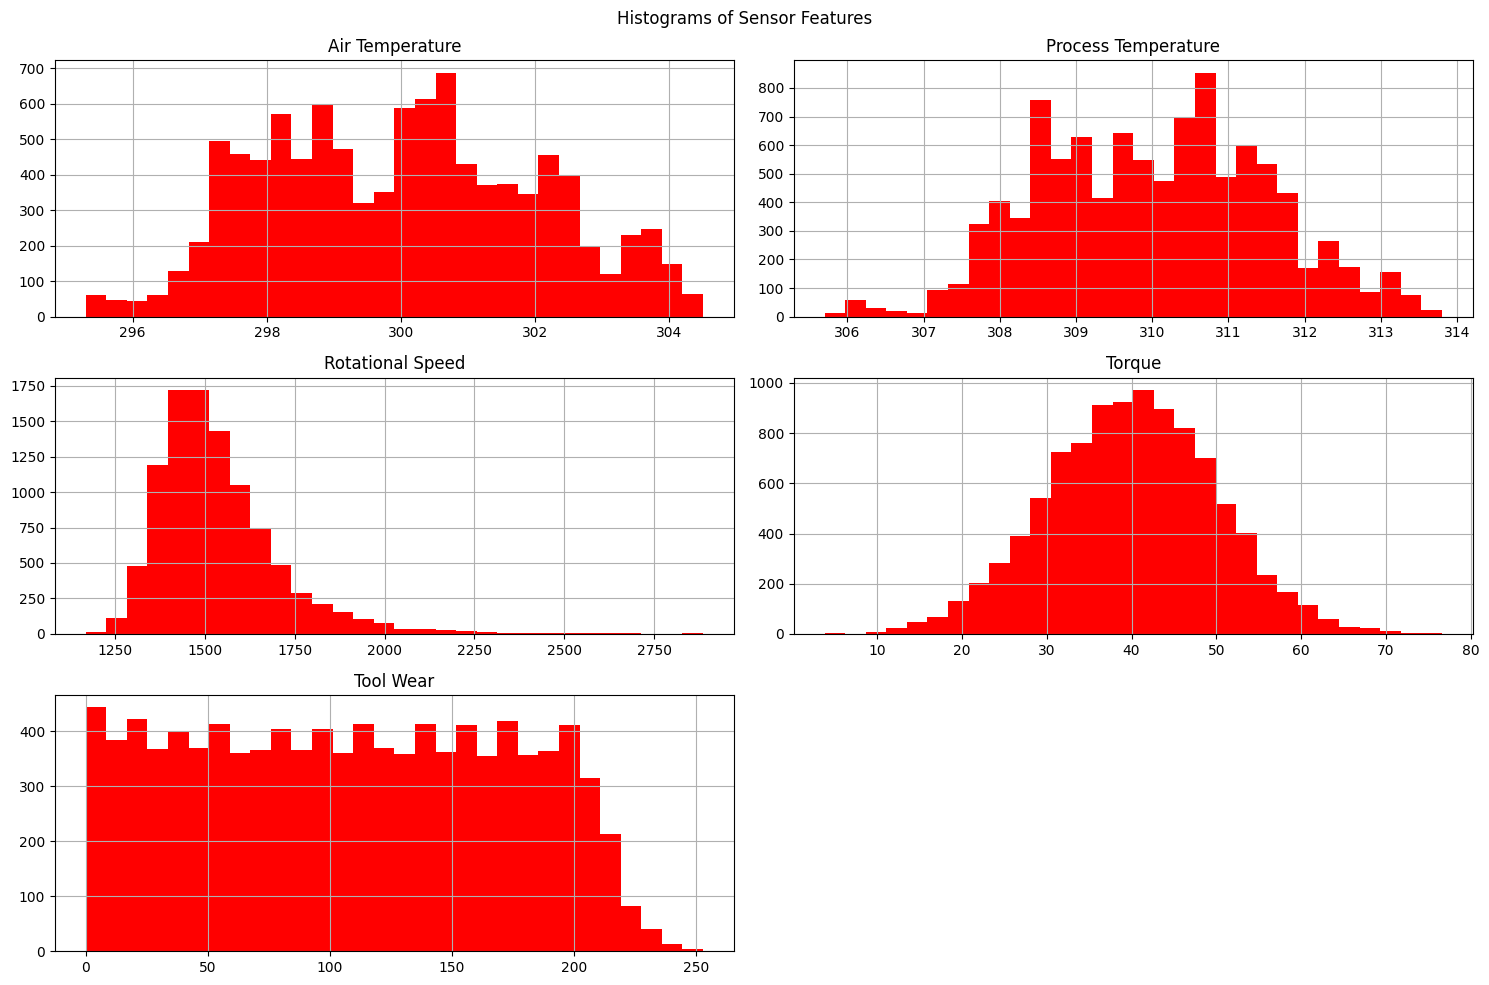

In [ ]:
#plotting Histogram to detect Outliers
import matplotlib.pyplot as plt
numeric_columns = ['Air Temperature', 'Process Temperature',
                   'Rotational Speed','Torque','Tool Wear']

print("\n📈 Histograms (to check if distribution is normal or skewed)")
df[numeric_columns].hist(figsize=(15, 10), bins=30, color='red')
plt.suptitle("Histograms of Sensor Features")
plt.tight_layout()
plt.show()


📦 Boxplots (to check for outliers)


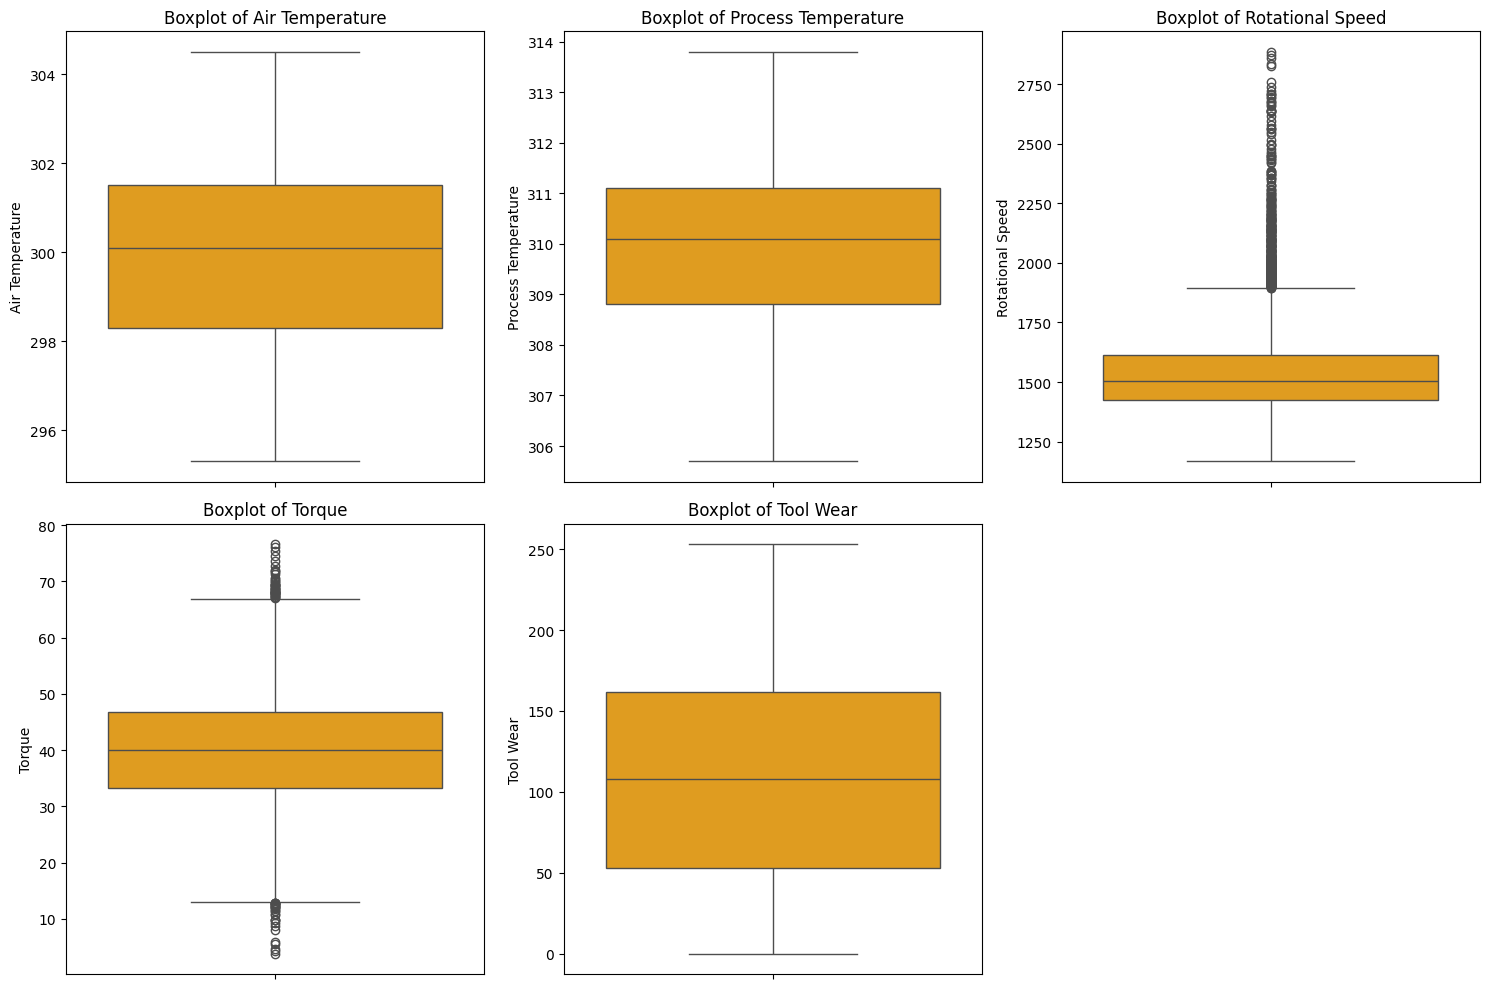

In [ ]:
#plotting boxplots to detect outliers
import seaborn as sns
print("\n📦 Boxplots (to check for outliers)")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
#finding row numbers of all rows where a failure occured
idx_fail=df.loc[df['Failure Type']!='No Failure'].index
print(idx_fail)
#Creating a new DataFrame that contain only the rows where a Failure occured
df_fail=df.loc[idx_fail]
#calculating the percentage of each failure type
df_fail_percentage=100*df_fail['Failure Type'].value_counts()/df_fail.shape[0]
print(df_fail_percentage)

Index([  50,   69,   77,  160,  161,  168,  194,  207,  242,  248,
       ...
       9627, 9632, 9636, 9637, 9640, 9731, 9737, 9795, 9803, 9947],
      dtype='int64', length=330)
Failure Type
HDF    34.848485
PWF    27.575758
OSF    23.636364
TWF    13.939394
Name: count, dtype: float64


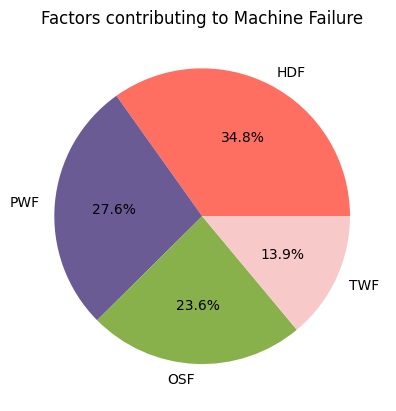

In [ ]:
#drawing a piechart
plt.title('Factors contributing to Machine Failure')
plt.pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors = ['#FF6F61',  # Coral Rose
          '#6B5B95',  # Royal Purple
          '#88B04B',  # Moss Green
          '#F7CAC9']  # Blush Pink
, autopct='%1.1f%%')
plt.show()

In [ ]:
df.dtypes

,0
Type,object
Air Temperature,float64
Process Temperature,float64
Rotational Speed,float64
Torque,float64
Tool Wear,float64
Machine Failure,int64
TWF,int64
HDF,int64
PWF,int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Type']=LabelEncoder().fit_transform(df['Type'])
df.dtypes

,0
Type,int64
Air Temperature,float64
Process Temperature,float64
Rotational Speed,float64
Torque,float64
Tool Wear,float64
Machine Failure,int64
TWF,int64
HDF,int64
PWF,int64


In [ ]:
df.head()

,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,2,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0,No Failure
1,1,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0,No Failure
2,1,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0,No Failure
3,1,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0,No Failure
4,1,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0,No Failure


In [ ]:
print(type(df['Failure Type'].iloc[0]))

<class 'str'>


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols.tolist())

# Get their index positions
print("Their index positions:", [df.columns.get_loc(col) for col in categorical_cols])

Categorical columns: ['Failure Type']
Their index positions: [12]


In [ ]:
#checking whether if any column in dataframe contains list-type values in any of its rows
for col in df.columns:#loops through every column in data frame
    has_list = df[col].apply(lambda x: isinstance(x, list)).any()#for a column,check each row and if value is a list returns True orelse False
    if has_list:
        print(f"⚠️ Column '{col}' has list-type values")


In [ ]:
df.head()

,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,2,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0,No Failure
1,1,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0,No Failure
2,1,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0,No Failure
3,1,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0,No Failure
4,1,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0,No Failure


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].apply(type).unique()}")


Type: [<class 'int'>]
Air Temperature: [<class 'float'>]
Process Temperature: [<class 'float'>]
Rotational Speed: [<class 'float'>]
Torque: [<class 'float'>]
Tool Wear: [<class 'float'>]
Machine Failure: [<class 'int'>]
TWF: [<class 'int'>]
HDF: [<class 'int'>]
PWF: [<class 'int'>]
OSF: [<class 'int'>]
RNF: [<class 'int'>]
Failure Type: [<class 'str'>]


In [ ]:
#finding correct categorical features indices for Smotenc
x=df.drop(columns=['Failure Type','Machine Failure','TWF','HDF','PWF','OSF','RNF'])#x contains only features
print(x.dtypes)
categorical_features=[x.columns.get_loc('Type')]
print(categorical_features)


Type                     int64
Air Temperature        float64
Process Temperature    float64
Rotational Speed       float64
Torque                 float64
Tool Wear              float64
dtype: object
[0]


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC#SMOTE for datasets with mixed categorical and numeric features
#counting the number of no Failure samples
n_working=df['Failure Type'].value_counts()['No Failure']
print(n_working)
#desired length of the balanced dataset('No Failure should be 80% of total dataset)
desired_length=round(n_working/0.8)
#keeping "No Failure" as it is and oversampling the rest(failure type) using SMOTENC
#remaining 20% should be equally spread across 4 failure types,calculating how many samples are needed per minority class
spc=round((desired_length-n_working)/4)
print(spc)
#telling SMOTENC how many samples to have for each class after resampling
balance_course = {
    'No Failure': n_working,
    'OSF': spc,
    'HDF': spc,
    'PWF': spc,
    'TWF': spc
}
#Creating a SMOTENC object
sm=SMOTENC(categorical_features=[0],sampling_strategy=balance_course,random_state=0)
y=df['Failure Type']
#Applying SMOTENC to resample the data
x_resampled,y_resampled=sm.fit_resample(x,y)

9643
603


In [ ]:
#combining x_resampled and y_resampled to form df_res
# Step 1: Combine back X and y into a single DataFrame
df_res = x_resampled.copy()
df_res['Failure_Type'] = y_resampled
#deriving machine failure:
df_res['Machine Failure'] = df_res['Failure_Type'].apply(lambda x: 1 if x != 'No Failure' else 0)
print(df_res)


       Type  Air Temperature  Process Temperature  Rotational Speed  \
0         2       298.100000           308.600000       1551.000000   
1         1       298.200000           308.700000       1408.000000   
2         1       298.100000           308.500000       1498.000000   
3         1       298.200000           308.600000       1433.000000   
4         1       298.200000           308.700000       1408.000000   
...     ...              ...                  ...               ...   
12050     1       300.443424           309.990323       1403.071133   
12051     0       300.104390           309.497797       1410.318699   
12052     1       300.515810           310.454348       1654.173905   
12053     2       300.084603           309.684603       1395.794976   
12054     1       302.366720           310.361657       1447.823606   

          Torque   Tool Wear Failure_Type  Machine Failure  
0      42.800000    0.000000   No Failure                0  
1      46.300000    3.000

In [ ]:
# Selecting row numbers of all rows in df_res where an actual failure has occured
idx_fail_res = df_res.loc[df_res['Failure_Type'] != 'No Failure'].index
#df_res_fail is a new dataframe that contains only rows where there was a failure
df_res_fail = df_res.loc[idx_fail_res]
#percentage of each failure type
fail_res_percentage = 100*df_res_fail['Failure_Type'].value_counts()/df_res_fail.shape[0]
print(df_res_fail)
print(fail_res_percentage)

       Type  Air Temperature  Process Temperature  Rotational Speed  \
50        1       298.900000           309.100000       2861.000000   
69        1       298.900000           309.000000       1410.000000   
77        1       298.800000           308.900000       1455.000000   
160       1       298.400000           308.200000       1282.000000   
161       1       298.300000           308.100000       1412.000000   
...     ...              ...                  ...               ...   
12050     1       300.443424           309.990323       1403.071133   
12051     0       300.104390           309.497797       1410.318699   
12052     1       300.515810           310.454348       1654.173905   
12053     2       300.084603           309.684603       1395.794976   
12054     1       302.366720           310.361657       1447.823606   

          Torque   Tool Wear Failure_Type  Machine Failure  
50      4.600000  143.000000          PWF                1  
69     65.700000  191.000

In [ ]:
#finding how much the dataset has grown after SMOTENC oversampling
print('Percentage increment of observations after oversampling:',
      round((df_res.shape[0]-df.shape[0])*100/df.shape[0],2))

Percentage increment of observations after oversampling: 20.88


In [ ]:
#after SMOTENC dataset has 20.88% more rows than before- to balance out the failure types

In [ ]:
#calculating what percentage of your final,resampled datsaset consist of failure cases,after SMOTENC was applied
print('SMOTE Resampled Failures percentage:',
      round(df_res_fail.shape[0]*100/df_res.shape[0],1))


SMOTE Resampled Failures percentage: 20.0


In [ ]:
#20.0% of your new,balanced dataset consist of actual failure cases

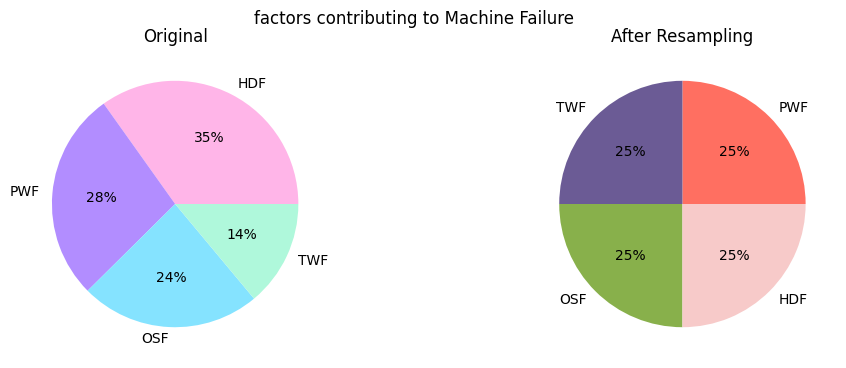

In [ ]:
# Pie plot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize=(12,4))
fig.suptitle('factors contributing to Machine Failure')
axs[0].pie(x=df_fail_percentage.array, labels=df_fail_percentage.index.array,
        colors = ['#FFB5E8', '#B28DFF', '#85E3FF', '#AFF8DB']
, autopct='%.0f%%')
axs[1].pie(x=fail_res_percentage.array, labels=fail_res_percentage.index.array,
        colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']
, autopct='%.0f%%')
axs[0].title.set_text('Original')
axs[1].title.set_text('After Resampling')
plt.show()

In [ ]:
df['Type']=pd.read_csv('ai4i2020.csv')['Type']
df.head()

,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Machine Failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0,No Failure


In [ ]:
print(df_res['Type'].unique())
df_res['Type']=df_res['Type'].map({0:'H',1:'L',2:'M'})
df_res.head()

[2 1 0]


,Type,Air Temperature,Process Temperature,Rotational Speed,Torque,Tool Wear,Failure_Type,Machine Failure
0,M,298.1,308.6,1551.0,42.8,0.0,No Failure,0
1,L,298.2,308.7,1408.0,46.3,3.0,No Failure,0
2,L,298.1,308.5,1498.0,49.4,5.0,No Failure,0
3,L,298.2,308.6,1433.0,39.5,7.0,No Failure,0
4,L,298.2,308.7,1408.0,40.0,9.0,No Failure,0


In [ ]:
print(df_res.columns.tolist())


['Type', 'Air Temperature', 'Process Temperature', 'Rotational Speed', 'Torque', 'Tool Wear', 'Failure_Type', 'Machine Failure']


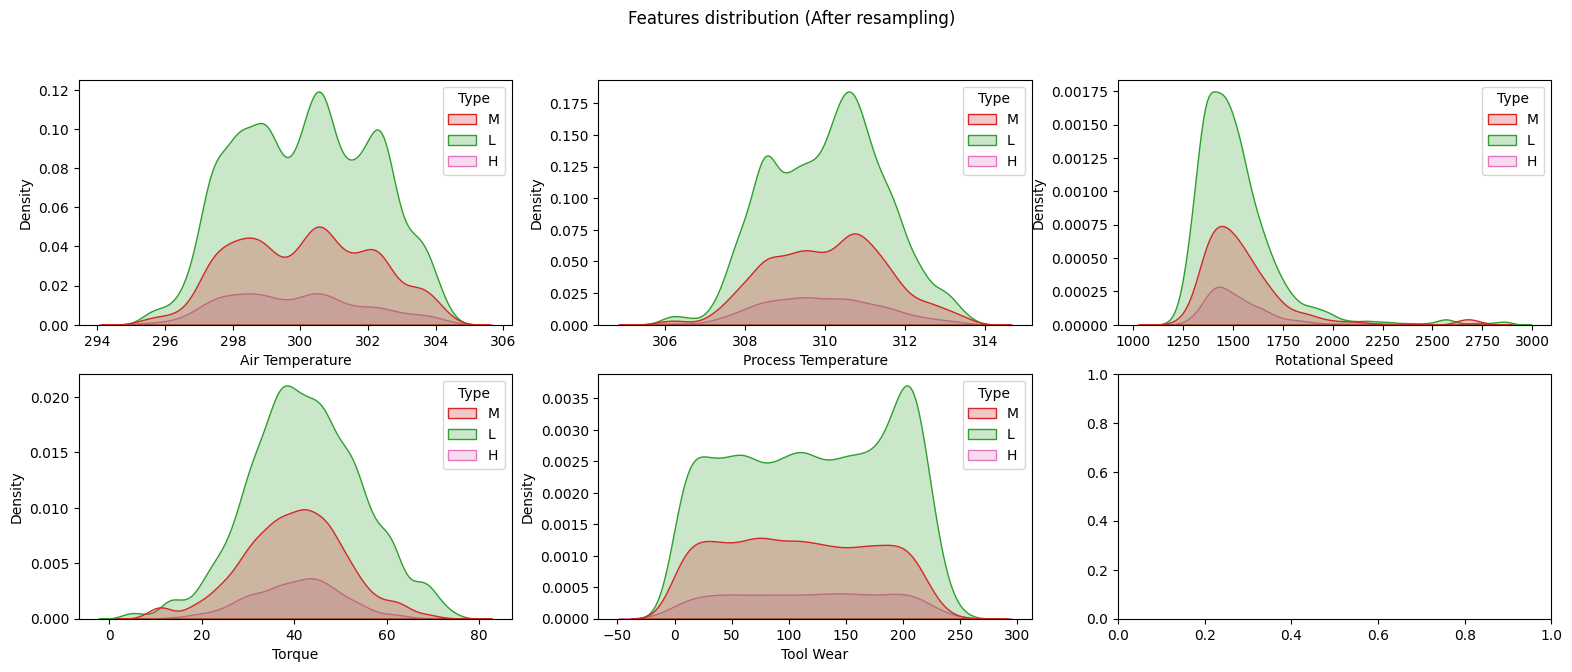

In [ ]:
#plotting KDE plot for numeric features
#axs will be a 2D array of axes objects(axs[0][0],axs[0],[0],..)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,7))#creating a 2 row by 3 column gridof plots(6 subplots in Total)
fig.suptitle('Features distribution (After resampling)')#adding a main title to full grid of plots
custom_palette = {'L':'tab:green', 'M':'tab:red', 'H':'tab:pink'}
#num_features is the list of numeric column names
#enumerate gives :j - the index(0,1,2,...) and feature (the column name)
num_features=['Air Temperature','Process Temperature','Rotational Speed','Torque','Tool Wear']
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_res, x=feature,
              hue='Type', fill=True, palette=custom_palette)
plt.show()

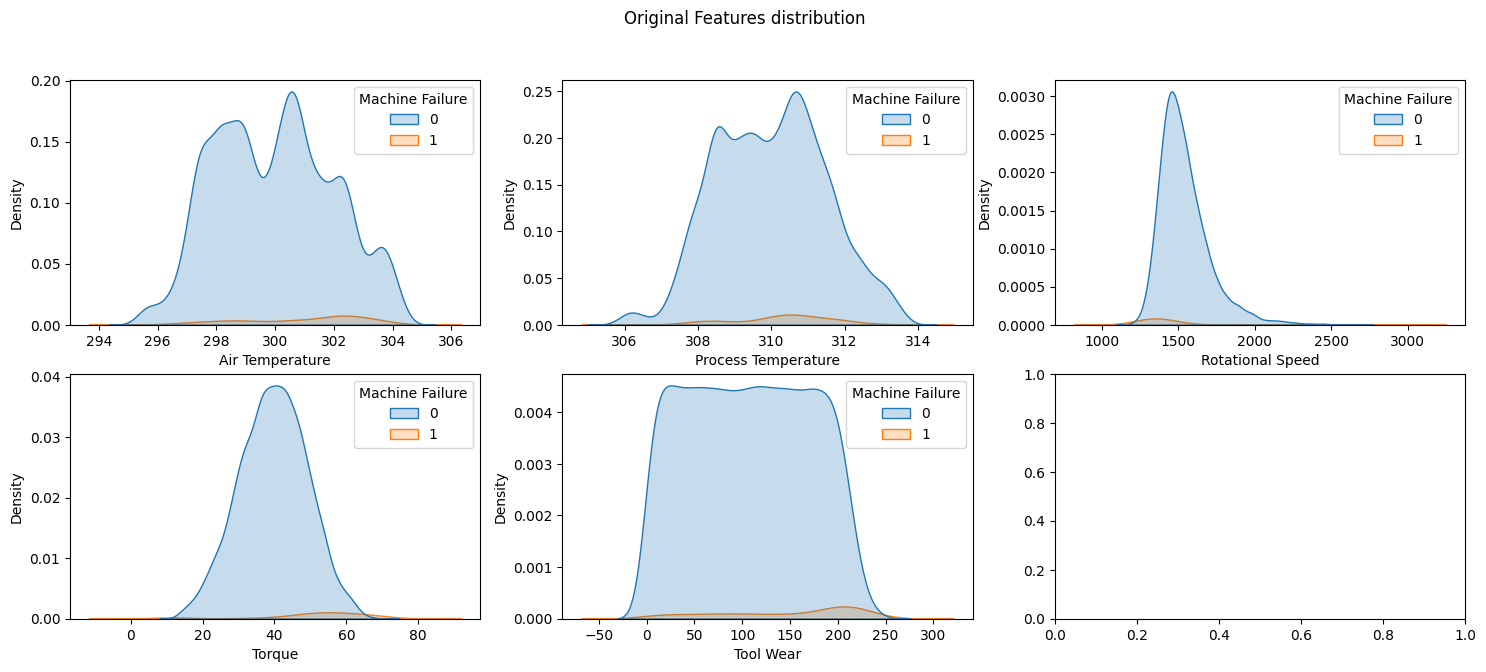

In [ ]:
#KDE distribution of features before resampling
#visualizing how the feature distributions differ between machines that failed vs. didnt fail before resampling
 # Kdeplot of numeric features (Original)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Original Features distribution')
enumerate_features = enumerate(num_features)
for j, feature in enumerate_features:
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df, x=feature,
                hue='Machine Failure', fill=True, palette='tab10')
plt.show()


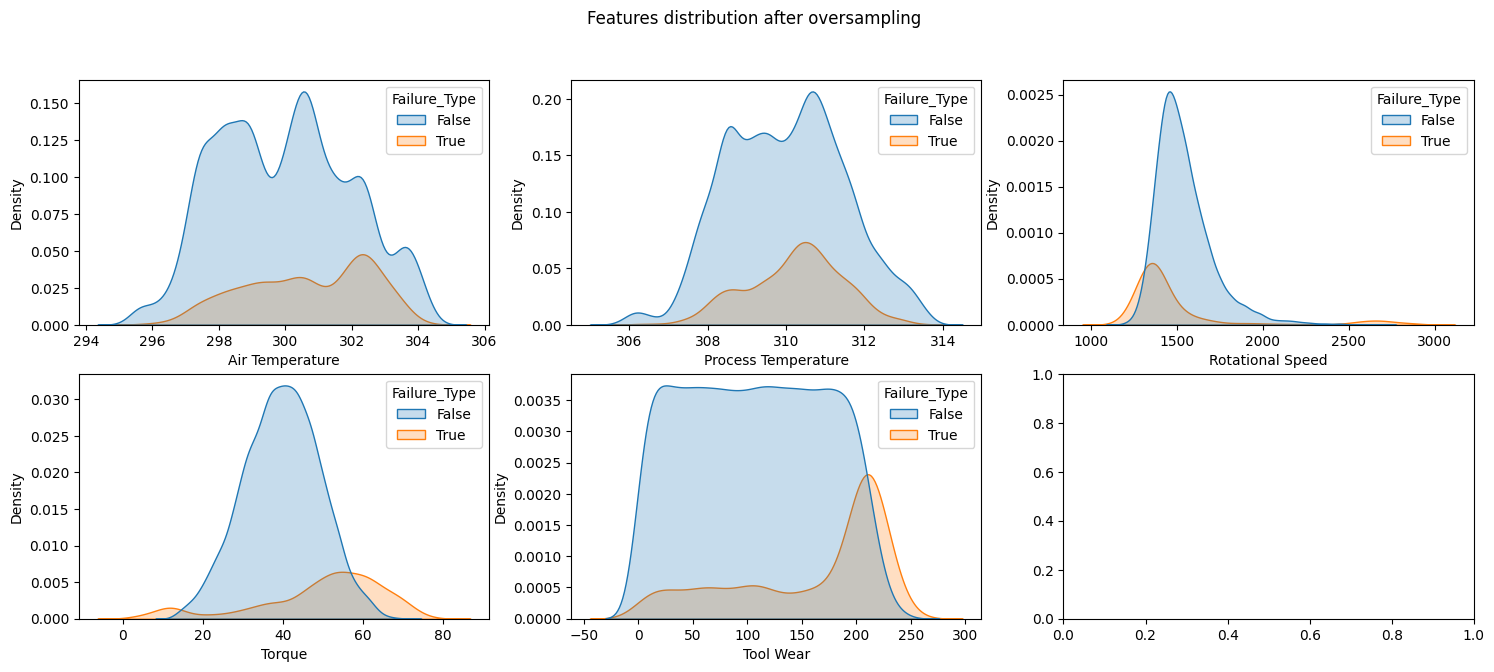

In [ ]:
# Kdeplot of numeric features (After resampling)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,7))
fig.suptitle('Features distribution after oversampling')
enumerate_features = enumerate(num_features)
for j, feature in enumerate_features:
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_res, x=feature,
                hue=df_res['Failure_Type']!= "No Failure", fill=True, palette='tab10')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler#making sure features are on same scale
from sklearn.decomposition import PCA

sc = StandardScaler()
#creates a dictionary to convert categorical levels of 'Type' into numbers
type_dict = {'L': 0, 'M': 1, 'H': 2}
cause_dict = {'No Failure': 0,
              'PWF': 1,
              'OSF': 2,
              'HDF': 3,
              'TWF': 4}
df_pre = df_res.copy()#Makes a copy of og. dataframe df_res
# Encoding
df_pre['Type'].replace(to_replace=type_dict, inplace=True)#convert categorical levels of 'Type' into numbers
df_pre['Failure_Type'].replace(to_replace=cause_dict, inplace=True)
# Scaling
#We standardize the data to give each variable equal importance
df_pre[num_features] = sc.fit_transform(df_pre[num_features])

/tmp/ipython-input-61-46484011.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pre['Type'].replace(to_replace=type_dict, inplace=True)#convert categorical levels of 'Type' into numbers
/tmp/ipython-input-61-46484011.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pre['Type'].replace(

In [ ]:
#specifying the number of components as the length of numerical features
pca = PCA(n_components=len(num_features))#we are not reducing dimensions here; you're keeping all components to examine how variance is distributed.
X_pca = pd.DataFrame(data=pca.fit_transform(df_pre[num_features]), columns=['PC'+str(i+1) for i in range(len(num_features))])
#X_pca is the new dataframe holding principal components
print(X_pca.head())

var_exp = pd.Series(data=100*pca.explained_variance_ratio_, index=['PC'+str(i+1) for i in range(len(num_features))])#This line creates a Series called var_exp to store the percentage of variance explained by each principal component
# It multiplies the explained_variance_ratio_ from the PCA object by 100 to convert it into percentages. The index argument names each index like PC1, PC2, and so on. This way, you can see how much each component contributes to explaining the variance in your data
print(var_exp)
print('Explained variance ratio per component:', round(var_exp,2), sep='\n')#Prints the variance explained by each PC, rounded to 2 decimal places
print('Explained variance ratio with 3 components: '+str(round(var_exp.values[:3].sum(),2)))#Adds up the top 3 components’ variance.

        PC1       PC2       PC3       PC4       PC5
0 -1.257425 -0.703661 -1.711135  0.145956 -0.042875
1 -0.803139 -1.196658 -1.735711 -0.099233 -0.032781
2 -0.964953 -1.195509 -1.693636  0.377778 -0.033789
3 -1.122353 -0.836197 -1.629342 -0.417727  0.068926
4 -1.017944 -0.898179 -1.611108 -0.473921  0.025592
PC1    37.709731
PC2    36.797178
PC3    19.823402
PC4     3.087978
PC5     2.581712
dtype: float64
Explained variance ratio per component:
PC1    37.71
PC2    36.80
PC3    19.82
PC4     3.09
PC5     2.58
dtype: float64
Explained variance ratio with 3 components: 94.33


        PC1       PC2       PC3
0 -1.257425 -0.703661 -1.711135
1 -0.803139 -1.196658 -1.735711
2 -0.964953 -1.195509 -1.693636
3 -1.122353 -0.836197 -1.629342
4 -1.017944 -0.898179 -1.611108
   Air Temperature  Process Temperature  Rotational Speed    Torque  Tool Wear
0         0.581471             0.569456         -0.405122  0.411675   0.063336
1         0.402213             0.419518          0.574856 -0.570548  -0.079028
2        -0.009731             0.001693          0.074947 -0.067898   0.994824


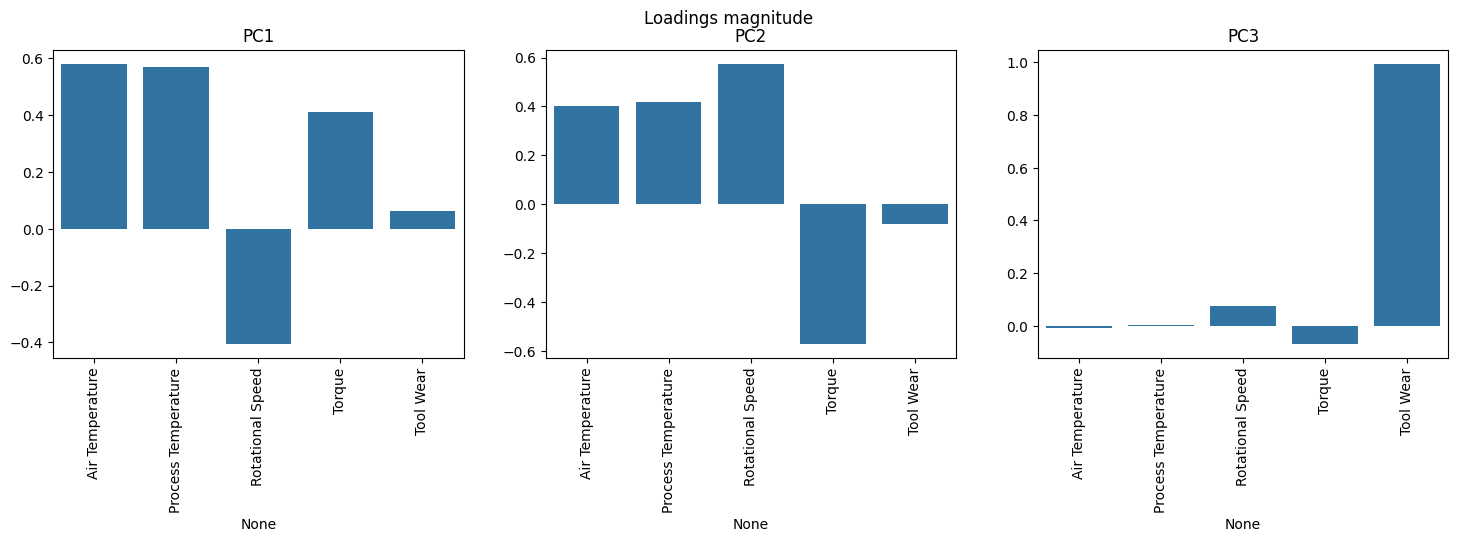

In [ ]:
# PCA for Data visualization
# pca3.fit_transform(data) does two things: it fits the PCA model to  data (finding the directions of maximum variance), and then it transforms the data into the first three principal components.

pca3 = PCA(n_components=3)# initializing a PCA object that will reduce your dataset to 3 principal components — ideal for both visualization (3D plots, if needed) and understanding the feature contributions to the top components.
X_pca3 = pd.DataFrame(data=pca3.fit_transform(df_pre[num_features]), columns=['PC1','PC2','PC3'])#This dataset can now be used for 3D plotting or clustering in PCA space.
print(X_pca3.head())
# Loadings Analysis
fig, axs = plt.subplots(ncols=3, figsize=(18,4))#ou're creating a plot with three subplots using plt.subplots(ncols=3, figsize=(18, 4))

fig.suptitle('Loadings magnitude')
pca_loadings = pd.DataFrame(data=pca3.components_, columns=num_features)#These values show how strongly each original feature “loads” onto each component, i.e., how important each feature is to a particular PC.
print(pca_loadings)# pca_loadings tells you which features are most influential for each principal component


for j in range(3):#The loop iterates over j from 0 to 2, representing each of your three subplots

    ax = axs[j]#selects the j-th subplot from your axs array

    sns.barplot(ax=ax, x=pca_loadings.columns, y=pca_loadings.values[j])#creates a bar plot on that subplot, with x as the feature names from pca_loadings and y as their corresponding loadings for the j-th principal component.

    ax.tick_params(axis='x', rotation=90)#rotates the x-axis labels by 90 degrees for better readability. ax.set_xticks()

    ax.title.set_text('PC'+str(j+1))#dds a title to each subplot. It dynamically sets the title as "PC1," "PC2," or "PC3," depending on the value of j.
# The str(j+1) converts the component number to a string so it can be concatenated with the text "PC."

#This helps you visually identify which features contribute most to each PC — very helpful for interpreting PCA!
plt.show()

In [ ]:
print(df_pre.head())

   Type  Air Temperature  Process Temperature  Rotational Speed    Torque  \
0     1        -1.014003            -0.998845          0.082767  0.106667   
1     0        -0.963633            -0.929380         -0.559442  0.404129   
2     0        -1.014003            -1.068311         -0.155255  0.667596   
3     0        -0.963633            -0.998845         -0.447168 -0.173797   
4     0        -0.963633            -0.929380         -0.559442 -0.131302   

   Tool Wear  Failure_Type  Machine Failure  
0  -1.727211             0                0  
1  -1.682857             0                0  
2  -1.653287             0                0  
3  -1.623718             0                0  
4  -1.594148             0                0  


In [ ]:
print(idx_fail_res)

Index([   50,    69,    77,   160,   161,   168,   194,   207,   242,   248,
       ...
       12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054],
      dtype='int64', length=2412)


   Temperature     Power  Tool Wear
0    -1.257425 -0.703661  -1.711135
1    -0.803139 -1.196658  -1.735711
2    -0.964953 -1.195509  -1.693636
3    -1.122353 -0.836197  -1.629342
4    -1.017944 -0.898179  -1.611108
[0          tab:blue
1          tab:blue
2          tab:blue
3          tab:blue
4          tab:blue
            ...    
12050    tab:purple
12051    tab:purple
12052    tab:purple
12053    tab:purple
12054    tab:purple
Name: Failure_Type, Length: 12055, dtype: object]
Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       9963, 9964, 9965, 9966, 9967, 9968, 9969, 9970, 9971, 9972],
      dtype='int64', length=9643)


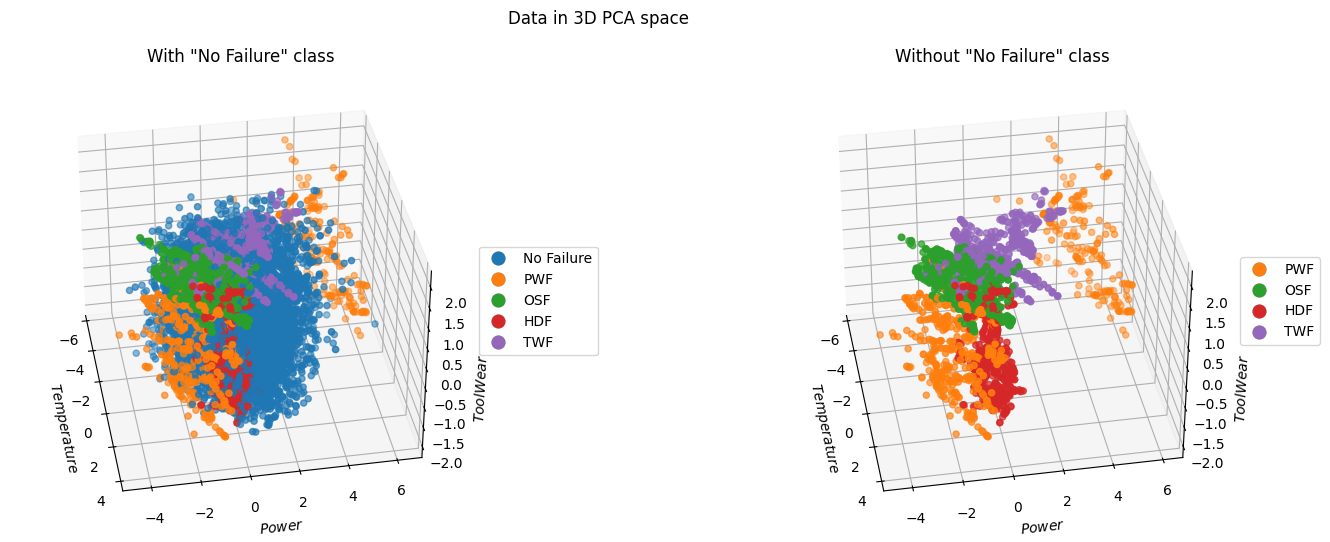

In [ ]:
#renaming the columns in PCA dataframe.
X_pca3.rename(mapper={'PC1':'Temperature',
                      'PC2':'Power',
                      'PC3':'Tool Wear'}, axis=1, inplace=True)
print(X_pca3.head())
# PCA plot
color = []
col = df_pre['Failure_Type'].map({0:'tab:blue',1:'tab:orange',2:'tab:green',3:'tab:red',4:'tab:purple'})#col is a series of color names
color.append(col)#this line is appending the entire col series to the list called color
print(color)
idx_w = col[col == 'tab:blue'].index#filters only those entries from col where the color is "blue"
print(idx_w)
color.append(col.drop(idx_w))#remove all rows from col where index is in idx_w, this creates a new series of color values excluding all the"blue"entries
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
labelTups = [('No Failure','tab:blue'),
             ('PWF', 'tab:orange'),
             ('OSF','tab:green'),
             ('HDF', 'tab:red'),
             ('TWF','tab:purple')]

fig = plt.figure(figsize=(18,6))
fig.suptitle('Data in 3D PCA space')
full_idx = X_pca3.index#fyll_idx is a list of all row labels in X_pca3
#idx_fail_res contains row numbers of all rows in df_res where an actual failure has occured.
for j, idx in enumerate([full_idx,idx_fail_res]):#you are creating 2 subplots:one for all mahcines,and one for failed machines only
    ax = fig.add_subplot(1, 2, j+1, projection='3d')#this adds a 3d subplot to the figure. consist of 1 row,2 columns(side-by-side plots),plot number:j+1
    #on first loop j=0,we get subplot 1 and on second loop j=1,we gwt subplot 2

#ax.scatter(..)is a 3D scatterplot function from Matplotlib

    lg = ax.scatter(X_pca3.loc[idx,'Temperature'],
                    X_pca3.loc[idx,'Power'],
                    X_pca3.loc[idx,'Tool Wear'],
                    c=color[j])
    ax.set_xlabel('$Temperature$')
    ax.set_ylabel('$Power$')
    ax.set_zlabel('$Tool Wear$')
    ax.title.set_text('With'+str(j*'out')+' "No Failure" class')
    ax.view_init(35, -10)
    custom_lines = [plt.Line2D([],[], ls="", marker='.',
                               mec='k', mfc=c, mew=.1, ms=20) for c in colors[j:]]
    ax.legend(custom_lines, [lt[0] for lt in labelTups[j:]],
              loc='center left', bbox_to_anchor=(1.0, .5))

plt.show()

In [ ]:
print(df_pre.head())
a=df_pre.corr()#calculate correlation matrix of dataframe df_pre
print(a)
b=np.triu(df_pre.corr())#np.triu(...) creates a mask for the upper triangle of the correlation matrix,hiding the upper half of heatmap to avoid duplicate error values
print(b)

   Type  Air Temperature  Process Temperature  Rotational Speed    Torque  \
0     1        -1.014003            -0.998845          0.082767  0.106667   
1     0        -0.963633            -0.929380         -0.559442  0.404129   
2     0        -1.014003            -1.068311         -0.155255  0.667596   
3     0        -0.963633            -0.998845         -0.447168 -0.173797   
4     0        -0.963633            -0.929380         -0.559442 -0.131302   

   Tool Wear  Failure_Type  Machine Failure  
0  -1.727211             0                0  
1  -1.682857             0                0  
2  -1.653287             0                0  
3  -1.623718             0                0  
4  -1.594148             0                0  
                         Type  Air Temperature  Process Temperature  \
Type                 1.000000        -0.037311            -0.017734   
Air Temperature     -0.037311         1.000000             0.870000   
Process Temperature -0.017734         0.870000  

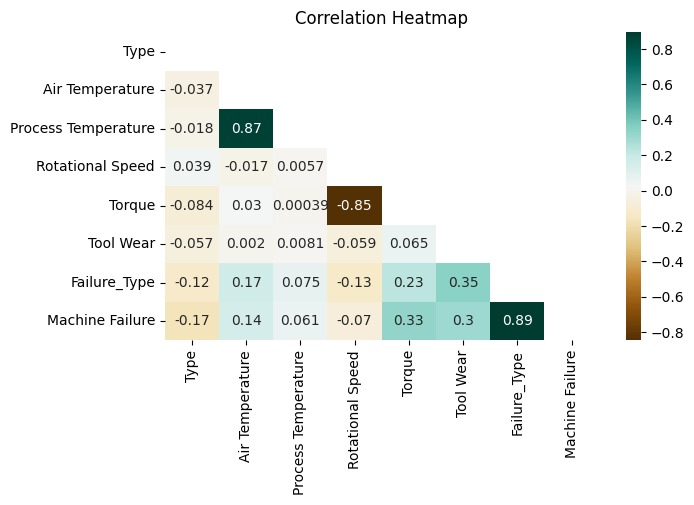

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(data=df_pre.corr(), mask=np.triu(df_pre.corr()), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

In [ ]:
print(df_pre[features])

       Type  Air Temperature  Process Temperature  Rotational Speed    Torque  \
0         1        -1.014003            -0.998845          0.082767  0.106667   
1         0        -0.963633            -0.929380         -0.559442  0.404129   
2         0        -1.014003            -1.068311         -0.155255  0.667596   
3         0        -0.963633            -0.998845         -0.447168 -0.173797   
4         0        -0.963633            -0.929380         -0.559442 -0.131302   
...     ...              ...                  ...               ...       ...   
12050     0         0.166394            -0.033049         -0.581577  0.121943   
12051     2        -0.004380            -0.375184         -0.549029  0.075659   
12052     0         0.202855             0.289290          0.546118 -0.956587   
12053     1        -0.014347            -0.245419         -0.614254  0.291674   
12054     0         1.135170             0.224902         -0.380595 -0.056950   

       Tool Wear  
0      -

In [ ]:
print(df_pre)

       Type  Air Temperature  Process Temperature  Rotational Speed    Torque  \
0         1        -1.014003            -0.998845          0.082767  0.106667   
1         0        -0.963633            -0.929380         -0.559442  0.404129   
2         0        -1.014003            -1.068311         -0.155255  0.667596   
3         0        -0.963633            -0.998845         -0.447168 -0.173797   
4         0        -0.963633            -0.929380         -0.559442 -0.131302   
...     ...              ...                  ...               ...       ...   
12050     0         0.166394            -0.033049         -0.581577  0.121943   
12051     2        -0.004380            -0.375184         -0.549029  0.075659   
12052     0         0.202855             0.289290          0.546118 -0.956587   
12053     1        -0.014347            -0.245419         -0.614254  0.291674   
12054     0         1.135170             0.224902         -0.380595 -0.056950   

       Tool Wear  Failure_T

In [ ]:
# train-validation-test split
X, y = df_pre[features], df_pre[['Machine Failure','Failure_Type']]
#splitting data into training and testing sets
#10% of data will go into test set
#stratify=df_pre['Failure_type'] ensures that the test set has the same distribution of failure types as the full dataset
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, stratify=df_pre['Failure_Type'], random_state=0)
#splitting the 90% of training data(X_trainval & y_trainval)into: TRAIN SET(80% of total data)& VALIDATION SET(10% of total data)
#creating a 80/10/10 train/val/test split
#X_train: actual training features
#X_val: validation Features
#y_train: training labels
#y_val: validation labels
#stratify=y_trainval['Failure_Type'] ensures each failure type is still properly represented in both train and val sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.11, stratify=y_trainval['Failure_Type'], random_state=0)

In [ ]:
#this function is used to evaluate a model's predictions, based on whether it’s a:

#binary classification (e.g., machine will fail or not)

#multi_class classification (e.g., failure types like TWF, HDF, etc.)
def eval_preds(model,X,y_true,y_pred,task):
#y_true: true target labes
#y_pred:model's predicted labels
#task either binary or multiclass
    if task == 'binary':#used when you are predicting Machine Failure
        # Extract task target
        y_true = y_true['Machine Failure']#extracting Machine Failure column from y_true datframe
        cm = confusion_matrix(y_true, y_pred)#calculating confusion metrics to see TP,TF,FP,FN
        # Probability of the minority class
        proba = model.predict_proba(X)[:,1]#predicted probability of class 1

        # Metrics
        acc = accuracy_score(y_true, y_pred)
        auc = roc_auc_score(y_true, proba)
        f1 = f1_score(y_true, y_pred, pos_label=1)
        f2 = fbeta_score(y_true, y_pred, pos_label=1, beta=2)
    elif task == 'multi_class':#used when you are predicting failure type
        y_true = y_true['Failure Type']
        cm = confusion_matrix(y_true, y_pred)
        proba = model.predict_proba(X)#as there as multiple classes
        # Metrics
        acc = accuracy_score(y_true, y_pred)
        auc = roc_auc_score(y_true, proba, multi_class='ovr', average='weighted')#multi_class='ovr': One-vs-Rest approach
        f1 = f1_score(y_true, y_pred, average='weighted')
        f2 = fbeta_score(y_true, y_pred, beta=2, average='weighted')
    metrics = pd.Series(data={'ACC':acc, 'AUC':auc, 'F1':f1, 'F2':f2})#creates a series with 4 named values
    metrics = round(metrics,3)#round each of the values to 3 decimal places
    return cm, metrics

In [ ]:
def tune_and_fit(clf,X,y,params,task):
#This defines a function named tune_and_fit() which:

#Tunes hyperparameters for your model using GridSearchCV.

#Fits the model to your data.

#Handles both binary and multi-class problems.
#clf	Your model (e.g., LogisticRegression() or DecisionTreeClassifier())
#X	Your feature matrix
#y	Your target (can be a DataFrame containing one or more columns)
#params	Hyperparameters to try (dictionary)
#task	Either 'binary' or 'multi_class'
    if task=='binary':
        f2_scorer = make_scorer(fbeta_score, pos_label=1, beta=2)
#This creates an F2 score evaluator that gives more weight to recall than precision.
#🔹 pos_label=1: Treat class 1 as positive (e.g., machine failed).
#🔹 beta=2: F2 score focuses more on recall (finding all failures).
        start_time = time.time()#Stores current time to measure how long training takes
        grid_model = GridSearchCV(clf, param_grid=params,
                                cv=5, scoring=f2_scorer)
#Creates a GridSearchCV object:

#Tries all combinations of hyperparameters (params)

#Performs 5-fold cross-validation (cv=5)

#Scores each combination using F2 score
        grid_model.fit(X, y['Machine Failure'])
    elif task=='multi_class':
        f2_scorer = make_scorer(fbeta_score, beta=2, average='weighted')
#average='weighted': Calculates F2 for each class separately, then gives a weighted average based on class frequency.

#beta=2: Still focusing more on recall.
        start_time = time.time()
        grid_model = GridSearchCV(clf, param_grid=params,
                              cv=5, scoring=f2_scorer)
        grid_model.fit(X, y['Failure Type'])

    print('Best params:', grid_model.best_params_)
    # Print training times
    train_time = time.time()-start_time
    mins = int(train_time//60)
    print('Training time: '+str(mins)+'m '+str(round(train_time-mins*60))+'s')#Shows total training time in minutes and seconds.
    return grid_model
  #This returns the trained GridSearchCV model, which includes:

#best_estimator_: the best model

#best_score_: its score

#predict(), .predict_proba() etc

In [ ]:
def predict_and_evaluate(fitted_models,X,y_true,clf_str,task):
#The goal of this function is to generate predictions, evaluate each model’s performance, and return:

#The predictions for each model.

#Confusion matrices.

#Performance metrics (Accuracy, AUC, F1, F2).
#fitted_models: A list of trained machine learning models.

#X: Feature set for prediction.

#y_true: True label values

#clf_str: A list of model names (strings) like ['Logistic Regression', 'Decision Tree'].

#task: 'binary' or 'multi_class'.


    cm_dict = {key: np.nan for key in clf_str}
#Creates a dictionary to store confusion matrices for each model.

#Keys are model names from clf_str, all values are initially np.nan.
    metrics = pd.DataFrame(columns=clf_str)
#Empty DataFrame where each column is a model name, and rows will later hold the scores (ACC, AUC, F1, F2).
    y_pred = pd.DataFrame(columns=clf_str)#Will store the predicted labels from each model.
    for fit_model, model_name in zip(fitted_models,clf_str):#Loop Through All Fitted Models
#fit_model: the actual trained model.

#model_name: its corresponding name from clf_str.
        # Generate predictions
        y_pred[model_name] = fit_model.predict(X)#Calls the .predict() method for the model and stores it in y_pred DataFrame under that model’s name.
        # Evaluate Predictions
#Calls the eval_preds() function (which you shared earlier) to:

#Get the confusion matrix.

#Get evaluation metrics (ACC, AUC, F1, F2).

#Stores these in cm and scores
        if task == 'binary':
            cm, scores = eval_preds(fit_model,X,y_true,
                                     y_pred[model_name],task)
        elif task == 'multi_class':
            cm, scores = eval_preds(fit_model,X,y_true,
                                     y_pred[model_name],task)
        # Store Results
        cm_dict[model_name] = cm
        metrics[model_name] = scores
        #Return Values
    return y_pred, cm_dict, metrics
#y_pred: DataFrame with predicted labels from each model.

#cm_dict: Dictionary of confusion matrices.

#metrics: DataFrame of scores (ACC, AUC, F1, F2) for each model.



In [ ]:
def fit_models(clf,clf_str,X_train,X_val,y_train,y_val):
#This function:

#Takes multiple classifiers clf (like Logistic Regression, Decision Tree, etc.)

#Their names as strings in clf_str (like 'LR', 'DT')

#And the training + validation datasets: X_train, X_val, y_train, y_val.
    metrics = pd.DataFrame(columns=clf_str)
#This creates an empty DataFrame where each column will represent a model (like 'LR', 'DT'), and each row will hold a metric like Accuracy, AUC, F1, F2.

# Loop Over Models and Names:
    for model, model_name in zip(clf, clf_str):
#You loop over both:

#model: each classifier object

#model_name: its corresponding name (like 'LR' or 'DT')

#train the Model:
        model.fit(X_train,y_train['Machine Failure'])#Here you're training the model on the X_train data and the binary target column
#Make Predictions on Validation Set:
        y_val_pred = model.predict(X_val)
#Evaluate Metrics Using eval_preds Function:
        metrics[model_name] = eval_preds(model,X_val,y_val,y_val_pred,'binary')[1]
#You call the previously defined eval_preds() function to get evaluation metrics (Accuracy, AUC, F1, F2) for this model.
#The [1] is used to select the metrics (not the confusion matrix which is at index [0]).
#Then you store the metric series under the column of that model’s name in the metrics DataFrame.

#Return the Final Metrics Table:
    return metrics

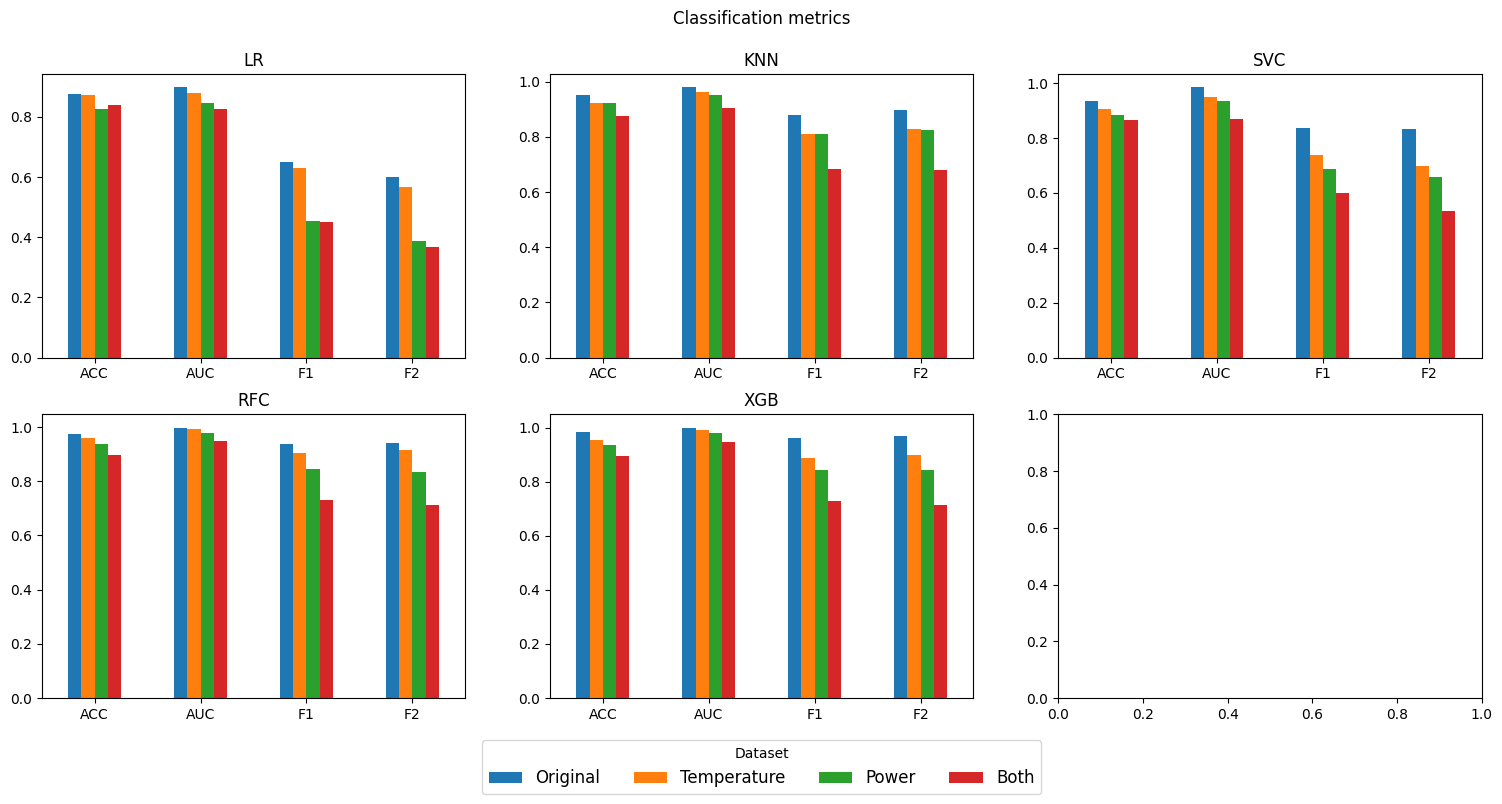

In [ ]:
#You are creating 5 ML classification models
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
rfc = RandomForestClassifier()
xgb = XGBClassifier()

#You store the models in one list (clf) and their short names in another (clf_str) so that you can loop through them easily.
clf = [lr,knn,svc,rfc,xgb]
clf_str = ['LR','KNN','SVC','RFC','XGB']

# Train on the original dataset
metrics_0 = fit_models(clf,clf_str,X_train,X_val,y_train,y_val)
#You’re training each of the 5 models on your original features, without modifying anything.

#metrics_0 will contain the evaluation results (accuracy, F1, etc.) for this baseline.

# Create a new feature = Temperature Product (Air × Process)

XX_train = X_train.drop(columns=['Process Temperature','Air Temperature'])#Dropping both temperature columns (to avoid redundancy)
XX_val = X_val.drop(columns=['Process Temperature','Air Temperature'])
XX_train['Temperature']= X_train['Process Temperature']*X_train['Air Temperature']#Adding a new column = their product as Temperature
XX_val['Temperature'] = X_val['Process Temperature']*X_val['Air Temperature']
#Training models again on this modified data
metrics_1 = fit_models(clf,clf_str,XX_train,XX_val,y_train,y_val)

# Create a new feature = Power (Torque × Rotational Speed)
XX_train = X_train.drop(columns=['Rotational Speed','Torque'])
XX_val = X_val.drop(columns=['Rotational Speed','Torque'])
XX_train['Power'] = X_train['Rotational Speed']*X_train['Torque']
XX_val['Power'] = X_val['Rotational Speed']*X_val['Torque']
metrics_2 = fit_models(clf,clf_str,XX_train,XX_val,y_train,y_val)

# Create a combo: both Temperature and Power
XX_train = X_train.drop(columns=['Process Temperature','Air Temperature','Rotational Speed','Torque'])
XX_val = X_val.drop(columns=['Process Temperature','Air Temperature','Rotational Speed','Torque'])
XX_train['Temperature']= X_train['Process Temperature']*X_train['Air Temperature']
XX_val['Temperature']= X_val['Process Temperature']*X_val['Air Temperature']
XX_train['Power'] = X_train['Rotational Speed']*X_train['Torque']
XX_val['Power'] = X_val['Rotational Speed']*X_val['Torque']
metrics_3 = fit_models(clf,clf_str,XX_train,XX_val,y_train,y_val)

#  Plotting All Results for Comparison
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
fig.suptitle('Classification metrics')
#Looping through each model:

#j gives the model index (0 to 4)

#Chooses a subplot box for each model

#Collects all 4 sets of results for that model (metrics_0 to metrics_3)

#Plots a bar chart comparing the 4 dataset versions

#Sets the title to the model name (e.g., 'LR', 'KNN')

#Removes the legend inside the subplot to avoid clutter
for j, model in enumerate(clf_str):
    ax = axs[j//3,j-3*(j//3)]
    model_metrics = pd.DataFrame(data=[metrics_0[model],metrics_1[model],metrics_2[model],metrics_3[model]])
    model_metrics.index = ['Original','Temperature','Power','Both']
    model_metrics.transpose().plot(ax=ax, kind='bar', rot=0, )
    ax.title.set_text(model)
    ax.get_legend().remove()
#Adjusts spacing of the whole plot for a cleaner look.

#✅ Adds one clear legend below the plots, explaining which bars mean 'Original', 'Temperature', 'Power', or 'Both'.

#✅ Finally shows the plot!
fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
axs.flatten()[-2].legend(title='Dataset', loc='upper center',
                         bbox_to_anchor=(0.5, -0.12), ncol=4, fontsize=12)
plt.show()

Validation set metrics:
ACC    0.877
AUC    0.898
F1     0.649
F2     0.599
dtype: float64
Test set metrics:
ACC    0.886
AUC    0.914
F1     0.668
F2     0.610
dtype: float64


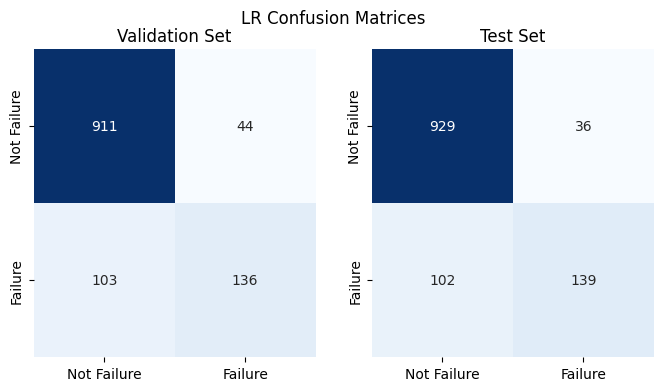

,feature,odds
4,Torque,17.621654
3,Rotational Speed,9.582702
1,Air Temperature,4.441372
5,Tool Wear,3.470969
0,Type,0.528956
2,Process Temperature,0.349291


In [ ]:
# Model Training and Predictions
lr = LogisticRegression(random_state=0)#his creates a Logistic Regression model object called lr.
lr.fit(X_train, y_train['Machine Failure'])#This trains the model using the training features (X_train) and the target variable (here, the 'Machine Failure' column from y_train).
y_val_lr = lr.predict(X_val)#This makes predictions on the validation set using the trained model.
y_test_lr = lr.predict(X_test)#This makes predictions on the test set.



#Model Evaluation with Custom Function
cm_val_lr, metrics_val_lr = eval_preds(lr,X_val,y_val,y_val_lr,'binary')#This line uses a custom function eval_preds()
#It takes the model and validation set, and returns:

#cm_val_lr: the confusion matrix on the validation set.

#metrics_val_lr: evaluation metrics (probably accuracy, precision, recall, F1-score, etc.).
cm_test_lr, metrics_test_lr = eval_preds(lr,X_test,y_test,y_test_lr,'binary')#for the test set.
print('Validation set metrics:',metrics_val_lr, sep='\n')
print('Test set metrics:',metrics_test_lr, sep='\n')#This prints the metrics for validation and test sets, one below the other.

#Confusion Matrix Plotting
cm_labels = ['Not Failure', 'Failure']
cm_lr = [cm_val_lr, cm_test_lr]
#Sets up:

#Labels for the confusion matrix axes.

#A list of both confusion matrices for later plotting.


# Show Confusion Matrices
fig, axs = plt.subplots(ncols=2, figsize=(8,4))
fig.suptitle('LR Confusion Matrices')
for j, title in enumerate(['Validation Set', 'Test Set']):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_lr[j], annot=True,
              fmt='d', cmap='Blues', cbar=False)
    axs[j].title.set_text(title)
    axs[j].set_xticklabels(cm_labels)
    axs[j].set_yticklabels(cm_labels)
#This loops over the two confusion matrices (validation and test):

#Draws each one as a heatmap using Seaborn (sns.heatmap()).

#annot=True writes the numbers inside each square.

#cmap='Blues' gives a blue color theme.

#cbar=False removes the side color bar.

#Then it sets titles and custom x/y tick labels ("Not Failure", "Failure").
plt.show()

# Odds Ratio Interpretation
d = {'feature': X_train.columns, 'odds': np.exp(lr.coef_[0])}#This line:

#Creates a dictionary d with:

#'feature': the feature names from X_train.

#'odds': odds ratio for each feature (i.e., how much it increases/decreases failure risk)(Logistic Regression learns coefficients (weights) for each feature.
#Taking the exponential np.exp() of these coefficients gives you odds ratios.)
odds_df = pd.DataFrame(data=d).sort_values(by='odds', ascending=False)#Converts the dictionary to a DataFrame called odds_df, and sorts features from highest to lowest odds.
odds_df#Displays the table showing which features most strongly influence the likelihood of machine failure.

In [ ]:
import pandas as pd
import numpy as np

# Assume you already have:
# - logistic_model (your trained model)
# - X_test (features of your test set)
# - y_test (actual labels for comparison, optional)
# - df_test (original dataframe with machine IDs or metadata)

# STEP 1: Predict probabilities
probabilities = lr.predict_proba(X_test)[:, 1]  # Prob of failure (class = 1)

# STEP 2: Set threshold (can be tuned; 0.5 is default)
#this is where you set the decision Boundary
threshold = 0.5  # You can change this to 0.6 or 0.7 for stricter risk filtering

# STEP 3: Predict class labels based on threshold
#convert probabilities to class labels
predicted_labels = (probabilities >= threshold).astype(int)#If prob >= threshold, it returns True (i.e., 1), else False (i.e., 0)

#.astype(int) changes True/False to 1/0

# STEP 4: Create a warning system DataFrame from the test set
warning_df = X_test.copy() # Create from X_test
warning_df['Failure_Probability'] = probabilities
warning_df['Predicted_Failure'] = predicted_labels

# Add 'Failure_Type' and 'Machine Failure' from the original df_pre for context
warning_df['Failure_Type'] = df_pre.loc[X_test.index, 'Failure_Type']
warning_df['Machine Failure'] = df_pre.loc[X_test.index, 'Machine Failure']


# STEP 5: Add risk level labels
#add a new column risk_level using a custom function
def risk_level(prob):
    if prob >= 0.8:
        return "Very High"
    elif prob >= 0.6:
        return "High"
    elif prob >= 0.4:
        return "Moderate"
    else:
        return "Low"

warning_df['Risk_Level'] = warning_df['Failure_Probability'].apply(risk_level)

# STEP 6: Filter high-risk machines
high_risk_machines = warning_df[warning_df['Predicted_Failure'] == 1]#filter only rows where model predicted failure

# Display Top 10 Machines Most Likely to Fail
top_10_risk = high_risk_machines.sort_values(by='Failure_Probability', ascending=False).head(10)#sort machines by highest failure probabilities and picks top 10 machines at greatest risk

print("🔔 Top 10 Machines Most Likely to Fail:")
print(top_10_risk[['Failure_Probability', 'Risk_Level', 'Failure_Type', 'Machine Failure']])

🔔 Top 10 Machines Most Likely to Fail:
       Failure_Probability Risk_Level  Failure_Type  Machine Failure
11143             0.992334  Very High             1                1
11020             0.989747  Very High             1                1
11139             0.988757  Very High             1                1
11401             0.987878  Very High             1                1
10252             0.986027  Very High             3                1
11137             0.983267  Very High             1                1
11325             0.975984  Very High             1                1
11416             0.974028  Very High             1                1
11258             0.973038  Very High             1                1
11316             0.966709  Very High             1                1


In [ ]:
#You are creating 4 classifiers:
knn = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
clf = [knn,svc,rfc,xgb]
clf_str = ['KNN','SVC','RFC','XGB']

# Hyperparameter Grids
knn_params = {'n_neighbors':[1,3,5,8,10]}#Number of neighbors in KNN (how many nearest points to check while classifying)
svc_params = {'C': [1, 10, 100],# Regularization strength
              'gamma': [0.1,1],#kernal coefficient
              'kernel': ['rbf'],#Radial basis function kernel
              'probability':[True],# Needed to enable `predict_proba`
              'random_state':[0]}
rfc_params = {'n_estimators':[100,300,500,700],# Number of trees in forest
              'max_depth':[5,7,10], # Max depth of each tree
              'random_state':[0]}
xgb_params = {'n_estimators':[300,500,700],
              'max_depth':[5,7],
              'learning_rate':[0.01,0.1], # How fast model learns (smaller is slower, more stable)
              'objective':['binary:logistic']}# Output type: binary classification

#Wrap All Parameter Grids in a Pandas Series
params = pd.Series(data=[knn_params,svc_params,rfc_params,xgb_params],
                   index=clf)#Creates a Series with models as keys and their respective parameter dictionaries as values.

#This helps map the correct parameter grid to the correct model in the next loop.

#  GridSearch and Training Loop
print('GridSearch start')
fitted_models_binary = []
for model, model_name in zip(clf, clf_str):
    print('Training '+str(model_name))
    fit_model = tune_and_fit(model,X_train,y_train,params[model],'binary')
    fitted_models_binary.append(fit_model)
#zip(clf, clf_str) pairs each model with its name.

#print() displays which model is currently being trained.

#tune_and_fit() is a custom function (probably you defined earlier) that:

#Runs GridSearchCV on the model using its hyperparameters,

#Fits it on X_train, y_train,

#Returns the best estimator.

#Each best-tuned model is saved to fitted_models_binary for future prediction or evaluation.

GridSearch start
Training KNN
Best params: {'n_neighbors': 1}
Training time: 0m 2s
Training SVC
Best params: {'C': 10, 'gamma': 1, 'kernel': 'rbf', 'probability': True, 'random_state': 0}
Training time: 1m 53s
Training RFC
Best params: {'max_depth': 10, 'n_estimators': 500, 'random_state': 0}
Training time: 3m 42s
Training XGB
Best params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 700, 'objective': 'binary:logistic'}
Training time: 0m 50s


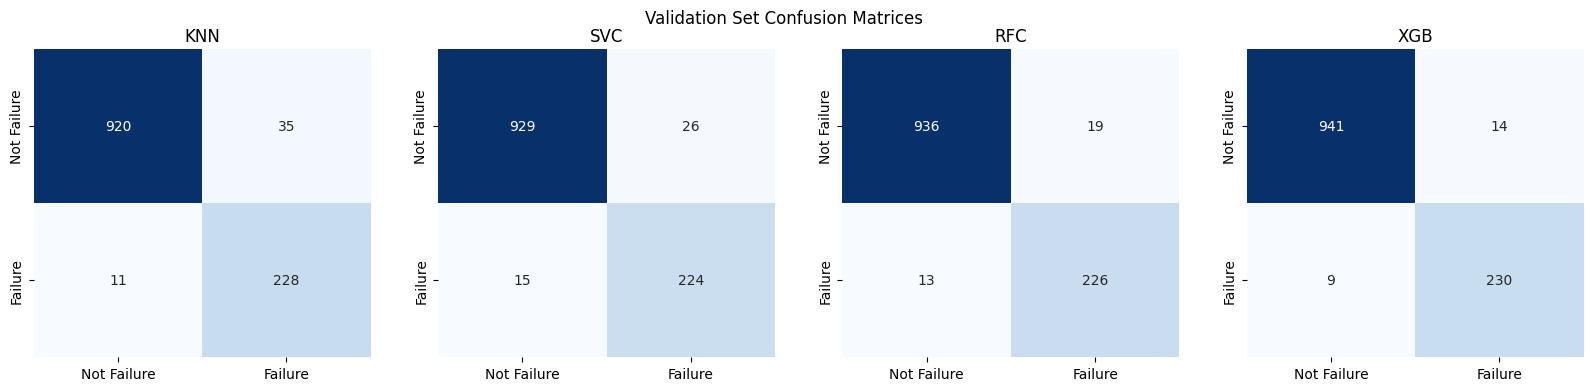

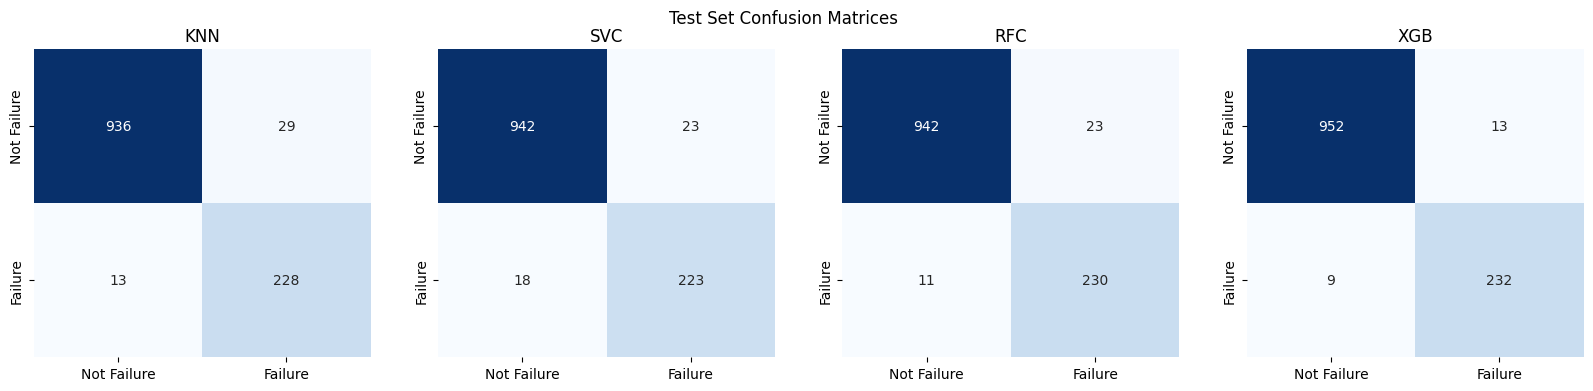


Validation scores:
       KNN    SVC    RFC    XGB
ACC  0.961  0.966  0.973  0.981
AUC  0.959  0.991  0.996  0.998
F1   0.908  0.916  0.934  0.952
F2   0.935  0.929  0.941  0.958
Test scores:
       KNN    SVC    RFC    XGB
ACC  0.965  0.966  0.972  0.982
AUC  0.958  0.990  0.997  0.998
F1   0.916  0.916  0.931  0.955
F2   0.934  0.921  0.945  0.959


In [ ]:
# Create evaluation metrics
#Task Definition
task = 'binary'
#Model Evaluation – Validation Set
y_pred_val, cm_dict_val, metrics_val = predict_and_evaluate(
    fitted_models_binary,X_val,y_val,clf_str,task)#Using your trained models (fitted_models_binary)

#On the validation data (X_val, y_val)

#Running them through your custom evaluation function predict_and_evaluate

#And receiving back:

#y_pred_val: predicted labels for each model on validation set

#cm_dict_val: confusion matrices per model on validation set

#metrics_val: evaluation metrics like accuracy, precision, recall, F1 for each model on validation set

#Model Evaluation – Test Set
y_pred_test, cm_dict_test, metrics_test = predict_and_evaluate(
    fitted_models_binary,X_test,y_test,clf_str,task)#now you're applying the same trained models to the test set to:

#Check how well your model performs on unseen data.

#Prevent overfitting and validate generalization.

# Plotting Confusion Matrices – Validation Set
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Validation Set Confusion Matrices')
#Loop through models and plot confusion matrices (validation)
for j, model_name in enumerate(clf_str):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_dict_val[model_name], annot=True,
                fmt='d', cmap='Blues', cbar=False)
    ax.title.set_text(model_name)
    ax.set_xticklabels(cm_labels)
    ax.set_yticklabels(cm_labels)
#For each model:

#Gets the matching axis subplot

#Draws a heatmap of its confusion matrix using seaborn

#Annotates the cells with raw count values (fmt='d')

#Turns off the colorbar for clarity

#Adds model name as title

#Labels x/y axis with class names (cm_labels → e.g., ['No Failure', 'Failure'])
plt.show()

# Plotting Confusion Matrices – Test Sets
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Test Set Confusion Matrices')
#Loop through models and plot confusion matrices (test)
for j, model_name in enumerate(clf_str):
    ax = axs[j]
    sns.heatmap(ax=ax, data=cm_dict_test[model_name], annot=True,
                fmt='d', cmap='Blues', cbar=False)
    ax.title.set_text(model_name)
    ax.set_xticklabels(cm_labels)
    ax.set_yticklabels(cm_labels)
#for test predictions:

#Lets you compare each model’s true vs. predicted class performance

#You’ll visually see:

#True Positives, True Negatives, False Positives, False Negatives

#Which models over-predict or under-predict failures
plt.show()

# Print scores
print('')
print('Validation scores:', metrics_val, sep='\n')
print('Test scores:', metrics_test, sep='\n')

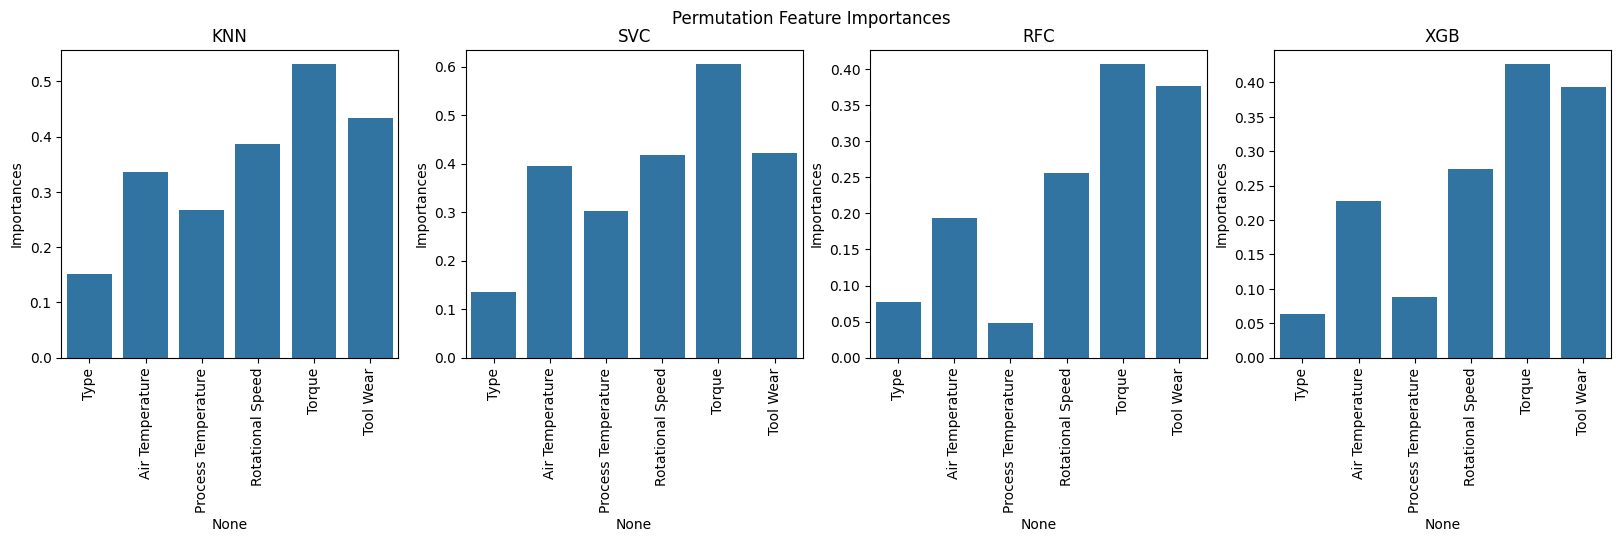

In [ ]:
# Evaluate Permutation Feature Importances
f2_scorer = make_scorer(fbeta_score, pos_label=1, beta=2)#You're creating a custom scorer based on the F-beta score with β = 2.
#make_scorer() → allows use of F2 as the metric during permutation.

#pos_label=1 → target class is 1, meaning machine failure.


importances = pd.DataFrame()#Empty DataFrame to store feature importances for each classifier.
for clf in fitted_models_binary:
    result = permutation_importance(clf, X_train,y_train['Machine Failure'],
                                  scoring=f2_scorer,random_state=0)#Looping over all your fitted binary classifiers (fitted_models_binary) like KNN, SVC, RFC, and XGB:

#permutation_importance() → measures how the model's performance changes when you randomly shuffle each feature.

#scoring=f2_scorer → performance is judged using F2 score.

#If shuffling a feature causes big performance drop, it's important.


    result_mean = pd.Series(data=result.importances_mean, index=X.columns)#The mean of importances across permutations is extracted and turned into a pandas Series, with features as index and importance values as data.
    importances = pd.concat(objs=[importances,result_mean],axis=1)#Add the current model’s importances into the DataFrame (column-wise).

#After this loop, importances will have columns for each model, and rows as features.
importances.columns = clf_str#Naming the columns based on the classifier names stored in clf_str, like:

#KNN, SVC, RFC, XGB

# Barplot of Feature Importances
fig, axs = plt.subplots(ncols=4, figsize=(20,4))
fig.suptitle('Permutation Feature Importances')
for j, name in enumerate(importances.columns):
    sns.barplot(ax=axs[j], x=importances.index, y=importances[name].values)#For each model:

#Plot feature names on x-axis.

#Their importance values on y-axis.

#axs[j] selects the j-th subplot for that model.
    axs[j].tick_params('x',labelrotation=90)#Rotates feature labels on x-axis by 90° for readability.
    axs[j].set_ylabel('Importances')
    axs[j].title.set_text(str(name))#Sets axis label and title (model name) for each plot.
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       965
           1       0.92      0.96      0.94       241

    accuracy                           0.98      1206
   macro avg       0.96      0.97      0.96      1206
weighted avg       0.98      0.98      0.98      1206

F2 Score: 0.9514


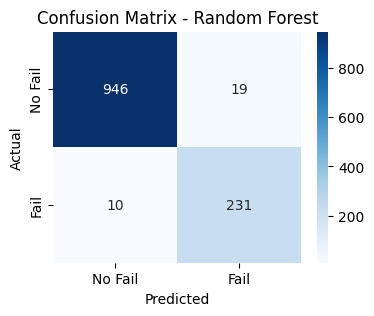

/tmp/ipython-input-83-1646739663.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.index, y=feature_importance.values, palette="crest")


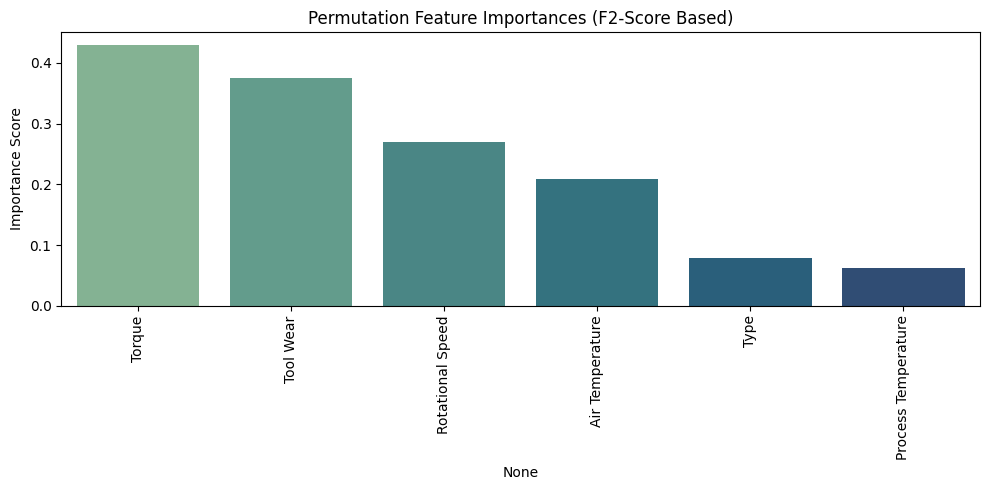

In [ ]:
#Random Forest
# 1. Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, fbeta_score, make_scorer
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 2. Define your features and target (in case not done)
X = df_pre.drop('Machine Failure', axis=1)
y = df_pre[['Machine Failure', 'Failure_Type']] # Keep both for potential multi-class later

# 3. Train-test split (already assumed done, else do this:)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train['Machine Failure'].values.ravel())  # y needs to be 1D

# 5. Predict on test set
y_pred = rf_model.predict(X_test)

# 6. Evaluate using classification report and F2-score
print("Classification Report:")
print(classification_report(y_test['Machine Failure'], y_pred)) # Evaluate against 'Machine Failure'

f2 = fbeta_score(y_test['Machine Failure'], y_pred, beta=2, pos_label=1) # Evaluate against 'Machine Failure'
print(f"F2 Score: {f2:.4f}")

# 7. Confusion Matrix
cm = confusion_matrix(y_test['Machine Failure'], y_pred) # Evaluate against 'Machine Failure'
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=["No Fail", "Fail"], yticklabels=["No Fail", "Fail"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# 8. Permutation Feature Importance (based on F2-score)
f2_scorer = make_scorer(fbeta_score, pos_label=1, beta=2)
perm_result = permutation_importance(rf_model, X_train, y_train['Machine Failure'].values.ravel(), scoring=f2_scorer, random_state=42) # Evaluate against 'Machine Failure'

# Convert to DataFrame for plotting
feature_importance = pd.Series(perm_result.importances_mean, index=X_train.columns) # Use X_train.columns
feature_importance = feature_importance.sort_values(ascending=False)

# Barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.index, y=feature_importance.values, palette="crest")
plt.title("Permutation Feature Importances (F2-Score Based)")
plt.xticks(rotation=90)
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

# 9. ✅ Predicting on future data (simulation)
# Suppose you have new machine data in a DataFrame `future_data` (same features as X)
# Example:
# future_data = pd.DataFrame({...}, columns=X.columns)

# Predict probability of failure
# future_prob = rf_model.predict_proba(future_data)[:, 1]  # probability of failure
# Predict label
# future_pred = rf_model.predict(future_data)

# Combine results
# future_data["Failure Probability"] = future_prob
# future_data["Failure Prediction"] = future_pred
# print(future_data)

# You can now filter high-risk machines like this:
# high_risk = future_data[future_data["Failure Prediction"] == 1]
# print("High Risk Machines:")
# print(high_risk)

⚠️ Machines predicted at high risk of failure:

       Type  Air Temperature  Process Temperature  Rotational Speed    Torque  \
10160     0         0.864844            -0.102640         -1.014026  1.472238   
10252     0         1.159258             0.297894         -1.038348  1.875169   
11251     0        -0.626429            -0.581393          5.950831 -3.128500   
10759     0        -0.799784            -0.657037         -0.719849  1.280392   
11323     0        -0.691246            -1.198277          4.640590 -2.443007   
10599     0        -0.116671             0.109386         -0.758195  1.475406   
2228      0        -0.308815            -0.929380          4.564757 -2.426009   
11481     0        -1.021374            -0.767075          5.990045 -3.152732   
10989     1         0.656943             0.922153          5.198783 -2.613374   
11257     1         0.716909             0.605178          5.484188 -2.819285   

       Tool Wear  Actual_Failure  Predicted_Probability Risk

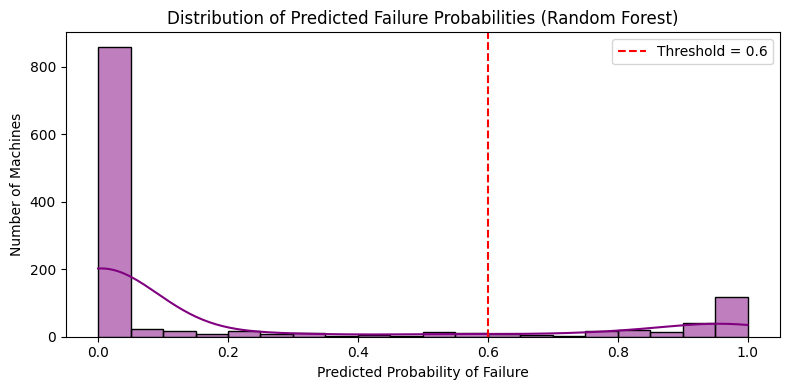

In [ ]:
#flag high risk models
# 1. Predict probability of failure for each sample in the test set
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Failure)

# 2. Attach probabilities and actual values to a DataFrame for analysis
rf_risk_df = X_test.copy()
rf_risk_df['Actual_Failure'] = y_test['Machine Failure'].values
rf_risk_df['Predicted_Probability'] = rf_probabilities

# 3. Set custom threshold to define “high risk”
custom_threshold = 0.60  # You can change this value (e.g., 0.7, 0.8)

# 4. Assign risk level based on predicted probability
rf_risk_df['Risk_Level'] = rf_risk_df['Predicted_Probability'].apply(
    lambda p: 'High' if p >= custom_threshold else 'Low'
)

# 5. Filter machines at high risk of failure
high_risk_machines = rf_risk_df[rf_risk_df['Risk_Level'] == 'High']

# 6. Display top high-risk machines
print("⚠️ Machines predicted at high risk of failure:\n")
print(high_risk_machines.sort_values(by='Predicted_Probability', ascending=False).head(10))

# Optional: Visualize probability distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(rf_risk_df['Predicted_Probability'], bins=20, kde=True, color='purple')
plt.axvline(custom_threshold, color='red', linestyle='--', label=f'Threshold = {custom_threshold}')
plt.title('Distribution of Predicted Failure Probabilities (Random Forest)')
plt.xlabel('Predicted Probability of Failure')
plt.ylabel('Number of Machines')
plt.legend()
plt.tight_layout()
plt.show()
